# Анализ объявлений о жилье в Турции

###    Введение: 
    Компания Zingat выступает посредником между потенциальными покупателями и продавцами на рынке недвижимости. 
    В связи с этим, помощь обеим сторонам в оценке стоимости недвижимости имеет решающее значение. 
    Для этого активно создаются новые и более совершенные модели, используя новейшие технологии в области анализа данных. 
    Лучшая модель определяется её эффективностью и экономической целесообразностью.
     
###    Исходные данные:
    Датасет real_estate_data, представляющий необходимые данные об рынке недвижимости (жилья) в Турции (на турецком языке).

### Цель: 
    Разработка лучшей модели, исходя из сравнительного анализа, для прогноза цен на рынке недвижимости.
    
### Этапы работы:
* Импортирование библиотек и модулей
* Загрузка, первичный анализ и предобработка данных
* Обучение и выявление лучшей модели
* Разработка приложения для оценки недвижимости и определения подтипа недвижимости

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Регина\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#настройка количества отображаемых столбцов и строк
pd.set_option('display.max_colwidth', None)  #показ всех столбцов
pd.set_option('display.max_rows', None)      #показ первых 10 строк
pd.set_option('display.width', None)       #ширина вывода

## Загрузка данных

In [4]:
#Загрузка датасета и удаление столбца с id
df = pd.read_csv('real_estate_data.csv')
df = df.drop(columns=['id'])
df.sample(10)

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
126696,Konut,Villa,2/17/19,NaN,1,10,16-20 arası,2,Müstakil,5+2,260.0,Sakarya/Karasu/İncilli,NaN,Kombi (Doğalgaz),2000000.0,TRY
74788,Konut,Daire,2/25/19,2/25/19,1,0,0,3,3,5+1,270.0,Antalya/Muratpaşa/Kızıltoprak,NaN,Klima,493000.0,TRY
45582,Konut,Daire,10/16/18,2/8/19,1,115,16-20 arası,5,Bahçe katı,2+1,100.0,Antalya/Alanya/Güller Pınarı,NaN,Klima,185000.0,TRY
310504,Konut,Rezidans,10/25/18,12/29/18,1,65,5,7,3,4+1,210.0,Konya/Meram/Toprak Sarnıç,NaN,Merkezi Sistem (Isı Payı Ölçer),495000.0,TRY
170781,Konut,Daire,1/13/19,NaN,1,45,0,4,1,2+1,100.0,İzmir/Torbalı/Fevzi Çakmak,NaN,Kombi (Doğalgaz),170000.0,TRY
131551,Konut,Daire,10/18/18,1/16/19,1,90,6-10 arası,4,Zemin Kat,2+1,80.0,İstanbul/Ümraniye/Çakmak,NaN,Kombi (Doğalgaz),225000.0,TRY
6863,Konut,Daire,1/13/19,NaN,2,45,2,10-20 arası,11,2+1,70.0,Adana/Çukurova/Huzurevleri,NaN,Kalorifer (Doğalgaz),14000.0,TRY
69399,Konut,Daire,9/17/18,9/18/18,2,1,26-30 arası,3,2,1+0,NaN,İstanbul/Beyoğlu/Bostan,NaN,Klima,1000.0,TRY
231945,Konut,Daire,11/16/18,11/16/18,2,0,0,5,4,3+1,NaN,İstanbul/Ümraniye/Parseller,NaN,Kombi (Doğalgaz),1550.0,TRY
261058,Konut,Daire,10/17/18,2/1/19,2,107,0,10-20 arası,8,3+1,125.0,Sivas/Merkez/Yeşilyurt,NaN,Kombi (Doğalgaz),950.0,TRY


#### Описание полей
* type - тип недвижимости 
* sub_type- подтип недвижимости (квартира/вилла/резиденция)
* start_date - дата размещения объявления	
* end_date- дата окончания размещения объявления
* listing_type - тип сделки (продажа/аренда)
* tom - время объявления на маркете
* building_age - возраст здания
* total_floor_count - количество этажей в здании	
* room_count- количество комнат(например, 2 + 1 представляет две комнаты + гостиная)
* size - площадь (m2)
* address - адрес (город/округ/район)
* furnished - обставленность мебелью
* currency - валюта  	
* floor_no - номер этажа
* price - цена недвижимости
* heating_type - отопительная система	

        •  Kalorifer (Doğalgaz) = центральное отопление газом, 
        •  Kalorifer (Kömür) = центральное отопление углём
        •  Kombi (Elektrikli) = комбинированный(электрический) котёл
        •  Klima = кондиционер
        •  Kombi (Doğalgaz) = газовый котел
        •  Merkezi Sistem = центральное отопление
        •  Merkezi Sistem (Isı Payı Ölçer) = центральное отопление(счётчик тепла)
        •  Yerden Isıtma = подогрев пола
        •  Soba (Kömür) = печка,
        •  Soba (Doğalgaz) = газовая печь
        •  Güneş Enerjisi = солнечная энергия,
        •  Jeotermal = геотермальная энергия
        •  Fancoil = тип кондиционера(с водой)
        •  Kat Kaloriferi = центральное отопление
        •  Kalorifer (Akaryakıt) = центральное отопление (мазут)
        •  Yok = нет отопления


#### Для дальнейшего прогноза цен на недвижимость выберем целевой признак - price

## Первичный анализ и предобработка данных

In [5]:
#Основная информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   type               403487 non-null  object 
 1   sub_type           403487 non-null  object 
 2   start_date         403487 non-null  object 
 3   end_date           266298 non-null  object 
 4   listing_type       403487 non-null  int64  
 5   tom                403487 non-null  int64  
 6   building_age       376097 non-null  object 
 7   total_floor_count  375466 non-null  object 
 8   floor_no           368191 non-null  object 
 9   room_count         403487 non-null  object 
 10  size               257481 non-null  float64
 11  address            403487 non-null  object 
 12  furnished          0 non-null       float64
 13  heating_type       375517 non-null  object 
 14  price              402772 non-null  float64
 15  price_currency     402772 non-null  object 
dtypes:

In [6]:
df.shape

(403487, 16)

#### Датасет состоит из <font color='red'> 403487 записей</font> и  <font color='red'>16 признаков</font>
#### Типы данных: float64(3), int64(2), object(11)

In [7]:
for column in df.columns:
    print(f"{column} - Пропущенных значений: {df[column].isna().sum()}\n")

type - Пропущенных значений: 0

sub_type - Пропущенных значений: 0

start_date - Пропущенных значений: 0

end_date - Пропущенных значений: 137189

listing_type - Пропущенных значений: 0

tom - Пропущенных значений: 0

building_age - Пропущенных значений: 27390

total_floor_count - Пропущенных значений: 28021

floor_no - Пропущенных значений: 35296

room_count - Пропущенных значений: 0

size - Пропущенных значений: 146006

address - Пропущенных значений: 0

furnished - Пропущенных значений: 403487

heating_type - Пропущенных значений: 27970

price - Пропущенных значений: 715

price_currency - Пропущенных значений: 715



 Пропущенных значений наблюдается большое кол-во, для обучения модели и нахождения самой лучшей, следует обработать и заменить типы данных у некоторых признаков.

#### Удалим также признаки furnished и type, так как они не несут важной информации для дальнейшей работы (furnished содержит только - 0, type содержит - Konut)

In [8]:
df.drop(['furnished','type'], axis=1, inplace=True)

In [9]:
# Преобразование дат в формат datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [10]:
end_missing = df['end_date'].isna().sum()
print(f"Количество записей с отсутствующим end_date: {end_missing}")

Количество записей с отсутствующим end_date: 137189


#### Во многих записях не указана дата снятия объявления об недвижимости с маркета, но признак tom (продолжительность видимости объявления на сайте). Поэтому заполним пропущенные значения даты конца объявления с помощью признака tom...

In [11]:
# Воспользуемся to_timedelta() для работы с промежутками времени
df['end_date'] = np.where(
    df['end_date'].isna() & df['tom'].notna() & df['start_date'].notna(),
    df['start_date'] + pd.to_timedelta(df['tom'], unit='d'),
    df['end_date']
)

In [12]:
print(f"Период: {df['start_date'].min()} - {df['end_date'].max()}")

Период: 2018-08-31 00:00:00 - 2019-02-27 00:00:00


#### Все объявления были созданы и завершены в период с 31 августа 2018 по 27 февраля 2019

In [13]:
# Среднее время продажи
days_on_market = (df['end_date'] - df['start_date']).dt.days
print(f"Среднее время продажи: {days_on_market.mean():.0f} дней")

Среднее время продажи: 57 дней


#### Проверка значений валюты в датасете

In [14]:
df['price_currency'].unique()

array(['TRY', 'GBP', 'EUR', 'USD', nan], dtype=object)

Присутствуют лиры, фунты стерлингов, евро и доллары

In [15]:
# выборка данных где отсутствует значение валюты
df_currency_is_nun = df[df['price_currency'].isna()]

In [16]:
df_currency_is_nun

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
7037,Daire,2018-12-11,2019-02-27,1,78,NaN,6,NaN,+,NaN,İstanbul/Esenyurt/İnönü,Kalorifer (Doğalgaz),NaN,NaN
7414,Daire,2018-11-17,2019-02-27,1,102,16-20 arası,3,Kot 1,3+1,120.0,Kocaeli/Gölcük/Donanma,Kalorifer (Doğalgaz),NaN,NaN
7492,Daire,2018-12-26,2019-02-27,1,63,0,6,2,3+1,90.0,İstanbul/Esenyurt/Şehitler,Kalorifer (Doğalgaz),NaN,NaN
8007,Daire,2018-10-12,2019-02-27,1,138,0,6,NaN,+,NaN,İstanbul/Esenyurt/İnönü,Kalorifer (Doğalgaz),NaN,NaN
10481,Daire,2019-01-19,2019-02-27,1,39,0,3,Yüksek Giriş,3+1,NaN,Ankara/Altındağ/Yıldıztepe,Kalorifer (Doğalgaz),NaN,NaN
10784,Daire,2018-10-24,2019-02-27,1,126,11-15 arası,5,3,3+1,125.0,Ankara/Etimesgut/Şeyh Şamil,Kalorifer (Doğalgaz),NaN,NaN
10977,Daire,2019-02-01,2019-02-27,1,26,6-10 arası,10,2,3+1,102.0,İstanbul/Esenyurt/Orhan Gazi,Kalorifer (Doğalgaz),NaN,NaN
11041,Rezidans,2018-12-16,2019-02-27,3,73,6-10 arası,10,Kot 4,1+1,65.0,İstanbul/Beylikdüzü/Cumhuriyet,Kalorifer (Doğalgaz),NaN,NaN
12002,Daire,2019-02-27,2019-02-27,2,0,21-25 arası,10-20 arası,13,3+1,115.0,İstanbul/Beylikdüzü/Barış,Kalorifer (Doğalgaz),NaN,NaN
12371,Daire,2018-09-26,2019-02-27,1,154,11-15 arası,4,3,5+2,NaN,İstanbul/Ümraniye/Namık Kemal,Kalorifer (Doğalgaz),NaN,NaN


In [17]:
print(f"price - Пропущенных значений: {df_currency_is_nun['price'].isna().sum()}")

price - Пропущенных значений: 715


In [18]:
# Доля пропущенных значений относительно датафрейма
df_currency_is_nun["price"].isna().sum()/df.shape[0]

0.0017720521355087029

#### Значения цены и значения валюты пропущены в одних и тех же строчках, также доля пропущенных значений ничтожно мала - удалим данные строки, так как они, к сожалению, не помогут в дальнейшем прогнозе цен.

In [19]:
df = df.dropna(subset=['price_currency'])

В датасете можно заметить цену с отрицательным и нулевым значением, что является <font color='red'>аномалией</font>.

In [20]:
df_sorted = df.sort_values('price').head(5)
styled_df = (df_sorted
             .style
             .background_gradient(subset=['price'], cmap='YlOrRd'))             
styled_df

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
350367,Müstakil Ev,2019-01-29 00:00:00,2019-02-27 00:00:00,2,29,6-10 arası,2,Bahçe katı,3+1,95.000000,İzmir/Kemalpaşa/Beşpınar,Soba (Kömür),-250.000000,TRY
251572,Rezidans,2018-11-27 00:00:00,2019-02-27 00:00:00,2,92,nan,5,5,1+1,nan,İstanbul/Beşiktaş/Gayrettepe,Kombi (Doğalgaz),0.000000,TRY
162735,Daire,2018-11-01 00:00:00,2019-02-27 00:00:00,2,118,nan,4,1,1+1,nan,Ankara/Çankaya/Büyükesat,Kombi (Doğalgaz),0.000000,TRY
112680,Daire,2018-09-02 00:00:00,2019-02-27 00:00:00,1,178,0,nan,nan,+,nan,İstanbul/Esenyurt/İnönü,Kombi (Doğalgaz),0.000000,TRY
91826,Daire,2018-09-02 00:00:00,2019-02-27 00:00:00,1,178,0,nan,nan,+,nan,İstanbul/Esenyurt/İnönü,Kombi (Doğalgaz),0.000000,TRY


Можем тоже исключить их.

In [21]:
df = df[df["price"] > 0]

Переведем всю иностранную валюту в лиры, для удобства

In [22]:
# Курсы валют на данный момент
exchange_rates = {
    'TRY': 1.0,
    'USD': 41.15,    # 1 USD = 41,15 TRY
    'EUR': 48.01,    # 1 EUR = 48,01 TRY
    'GBP': 55.32     # 1 GBP = 55,32 TRY
}

def convert_to_try(row):
    price = row['price']
    currency = row['price_currency']
    if pd.isna(price) or pd.isna(currency):
        return np.nan
    if currency in exchange_rates:
        return price * exchange_rates[currency]
    else:
        return price  

df['price'] = df.apply(convert_to_try, axis=1)

Просмотрим значения обозначающего количества комнат

In [23]:
df['room_count'].unique()

array(['2+1', '1+0', '6+1', '1+1', '3+1', '4+1', '2+2', '9+2', '5+2',
       '6+3', '6+2', '4+3', '9+5', '5+1', '3+2', '+', '4+2', '7+2', '9+4',
       '8+2', '8+3', '10+0', '8+4', '8+1', '7+1', '10+1', '9+3', '7+3',
       '10+2', '5+3', '9+1', '0+0', '10+5', '10+3', '10+4', '11+3',
       '15+5'], dtype=object)

In [24]:
df['room_count'].nunique()

37

Всего имеется 37 различных значений об кол-ве комнат в здании.

In [25]:
df['room_count'].value_counts()

room_count
3+1     157293
2+1     138620
1+1      39105
4+1      37469
5+1       8216
4+2       4539
5+2       2924
3+2       2673
1+0       2610
+         2307
6+1       2000
6+2       1516
2+2        836
7+1        523
7+2        428
10+0       313
8+1        218
8+2        189
6+3        167
5+3        139
4+3        133
7+3         86
9+1         71
9+3         65
9+2         61
8+3         55
8+4         38
10+1        35
10+2        30
9+5         27
9+4         26
10+3         9
10+5         2
0+0          1
10+4         1
11+3         1
15+5         1
Name: count, dtype: int64

#### Исключим строки где в значениях только "0+0", так как это значение имеется лишь в 1 записи.
#### Также есть значение "+", под которым возможно имеется ввиду продажа жилья <font color='blue'> с свободной планировкой</font> или же квартира <font color='blue'>студия</font> --> объединим его в категорию 1+0 (студия)

* Свободная планировка — это формат квартиры, в которой отсутствует чёткое внутреннее деление на комнаты. Стены не возведены, либо присутствуют только несущие конструкции. Чаще всего такая планировка встречается в новостройках, особенно на этапе сдачи дома в эксплуатацию.

In [28]:
df_plus=df[df['room_count']=='+']
df_plus.sample(5)

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
403047,Komple Bina,2019-01-15,2019-02-27,1,43,NaN,NaN,NaN,+,95.0,Ordu/Altınordu/Akyazı,NaN,550000.0,TRY
385625,Komple Bina,2018-09-13,2018-11-12,1,60,26-30 arası,5,NaN,+,NaN,Trabzon/Ortahisar/2 Nolu Erdoğdu,NaN,500000.0,TRY
328637,Komple Bina,2018-09-04,2018-11-04,1,61,6-10 arası,5,NaN,+,NaN,Trabzon/Ortahisar/Kalkınma,Merkezi Sistem,6000000.0,TRY
33695,Komple Bina,2018-11-28,2018-12-28,1,30,0,4,NaN,+,540.0,Antalya/Kepez/Düdenbaşı,Klima,1100000.0,TRY
809,Komple Bina,2018-10-17,2019-02-27,1,133,6-10 arası,1,NaN,+,NaN,Çanakkale/Ayvacık/Paşaköy Köyü,Yok,69000.0,TRY


In [29]:
df = df[df["room_count"] != "0+0"]
df["room_count"] = df["room_count"].replace("+", "1+0")

Заменим столбец на общее количество комнат, для упрощения интерпретации.

In [30]:
def get_total_rooms(room_count):
    if pd.isna(room_count):
        return np.nan
    try:
        parts = str(room_count).split('+')
        if len(parts) == 2:
            return int(parts[0]) + int(parts[1])
        else:
            return np.nan
    except:
        return np.nan

df['room_count'] = df['room_count'].apply(get_total_rooms)
df.sample(5)

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
100715,Müstakil Ev,2018-09-10,2018-11-09,2,60,16-20 arası,2,Bahçe katı,4,NaN,Kocaeli/Gölcük/Ulaşlı Yalı,Kombi (Doğalgaz),700.0,TRY
130874,Daire,2018-09-10,2018-10-10,2,30,NaN,NaN,Zemin Kat,2,NaN,Manisa/Turgutlu/Yıldırım,Kombi (Doğalgaz),900.0,TRY
8177,Daire,2018-09-13,2018-10-13,1,30,0,4,Teras Kat,5,NaN,İstanbul/Şişli/Fulya,Kalorifer (Doğalgaz),1800000.0,TRY
221158,Daire,2018-10-03,2018-12-18,1,76,6-10 arası,9,4,2,NaN,İstanbul/Pendik/Yenişehir,Kombi (Doğalgaz),245000.0,TRY
15937,Daire,2019-01-11,2019-02-25,1,45,36-40 arası,4,2,3,85.0,İstanbul/Kadıköy/Eğitim,Kalorifer (Doğalgaz),410000.0,TRY


### Проверка на дублирующиеся записи

In [121]:
num_duplicates = len(df) - len(df.drop_duplicates())
print(f"Дубликатов: {num_duplicates}")
print(f"Уникальных записей: {len(df.drop_duplicates())}")

Дубликатов: 11235
Уникальных записей: 391491


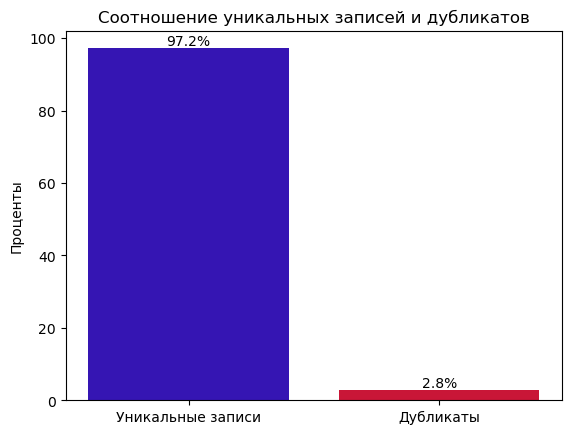

In [122]:
unique_percent = (len(df.drop_duplicates()) / len(df)) * 100
duplicates_percent = (num_duplicates / len(df)) * 100

categories = ['Уникальные записи', 'Дубликаты']
values = [unique_percent, duplicates_percent]
colors = ['#3515b3', '#c91637']

bars = plt.bar(categories, values, color=colors)

# Добавление значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.ylabel('Проценты')
plt.title('Соотношение уникальных записей и дубликатов')

plt.show()

Количество дубликатов невелико по отношению к остальным уникальным данным - удалим их, так как они могут исказить дальнейший прогноз цен

In [123]:
df = df.drop_duplicates()
num_duplicates = len(df) - len(df.drop_duplicates())
print(f"Дубликатов: {num_duplicates}")

Дубликатов: 0


Смотрим пропущенные значения

In [124]:
for column in df.columns:
    print(f"{column} - Пропущенные значений: {df[column].isna().sum()}")
    print(f"{column} - Доля пропущенных значений: {df[column].isna().sum()/df.shape[0]} ")
    print("----------------------------")

sub_type - Пропущенные значений: 0
sub_type - Доля пропущенных значений: 0.0 
----------------------------
start_date - Пропущенные значений: 0
start_date - Доля пропущенных значений: 0.0 
----------------------------
end_date - Пропущенные значений: 0
end_date - Доля пропущенных значений: 0.0 
----------------------------
listing_type - Пропущенные значений: 0
listing_type - Доля пропущенных значений: 0.0 
----------------------------
tom - Пропущенные значений: 0
tom - Доля пропущенных значений: 0.0 
----------------------------
building_age - Пропущенные значений: 25890
building_age - Доля пропущенных значений: 0.06613178847023303 
----------------------------
total_floor_count - Пропущенные значений: 26418
total_floor_count - Доля пропущенных значений: 0.06748047847843246 
----------------------------
floor_no - Пропущенные значений: 33154
floor_no - Доля пропущенных значений: 0.08468649343152206 
----------------------------
room_count - Пропущенные значений: 0
room_count - Доля п

Пропущенные значения остались у признаков building_age(возраст здания), floor_no(кол-во этажей), size(площадь,м2), heating_type(отопительная система)

In [125]:
df["building_age"].unique()

array(['0', '3', '2', nan, '1', '6-10 arası', '4', '16-20 arası',
       '26-30 arası', '40 ve üzeri', '11-15 arası', '21-25 arası', '5',
       '31-35 arası', '36-40 arası'], dtype=object)

In [126]:
# преобразование столбца с возрастом здания
def convert_age(value):
    if pd.isna(value):
        return np.nan
    elif '-' in value:
        parts = value.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 've üzeri' in value:
        return 40
    else:
        return int(value)

df['building_age'] = df['building_age'].apply(convert_age)

In [127]:
# Присвоим пустым значениям отдельную категорию -1 = не указано возраста здания
df['building_age'] = df['building_age'].fillna(-1)
df['building_age'] = df['building_age'].astype(int)

In [128]:
df['sub_type'].value_counts()

sub_type
Daire                  344278
Villa                   20628
Müstakil Ev              9212
Rezidans                 7402
Yazlık                   5769
Komple Bina              2526
Prefabrik Ev              622
Çiftlik Evi               503
Köşk / Konak / Yalı       277
Yalı Dairesi              172
Kooperatif                 68
Loft                       34
Name: count, dtype: int64

Квартиры и виллы на рынке недвижимости занимают большую его часть и меньшую часть занимают жилье Лофт и Кооперативное

Переведем данные на русский язык для лучшей интерпретации

In [129]:
# Перевод подтипа недвижимости
translation = {
    'Daire': 'Квартира',
    'Villa': 'Вилла', 
    'Müstakil Ev': 'Частный дом',
    'Rezidans': 'Резиденция',
    'Yazlık': 'Летний дом',
    'Prefabrik Ev': 'Сборный дом',
    'Komple Bina': 'Целое здание',
    'Çiftlik Evi': 'Фермерский дом',
    'Köşk / Konak / Yalı': 'Особняк / Усадьба',
    'Yalı Dairesi': 'Квартира у моря',
    'Kooperatif': 'Кооператив',
    'Loft': 'Лофт'
}
df['sub_type'] = df['sub_type'].map(translation)

In [130]:
# Перевод этажей
def convert_floor_no(value):
    if pd.isnull(value):
        return value
    value = str(value)
    if value == 'Asma Kat':
        return 'Полуэтаж'
    elif value == 'Bahçe katı':
        return 'Квартира на этаже в саду'
    elif value == 'Müstakil' or value == 'Komple':
        return 'Частный дом'
    elif value == 'Yüksek Giriş':
        return 'Первый этаж'
    elif value == 'En Üst Kat':
        return 'Самый верхний этаж'
    elif value == 'Çatı Katı':
        return 'Пентхаус'
    elif 'Kot' in value or value == 'Giriş Katı' or value == 'Zemin Kat':
        return 'Цокольный этаж'
    elif value == 'Teras Kat':
        return 'Террасный этаж'
    elif value == 'Bodrum Kat':
        return 'Подвал'
    elif value == '20 ve üzeri':
        return '20 и выше'
    else:
        return value


df['floor_no'] = df['floor_no'].apply(convert_floor_no)

In [131]:
# Перевод для отопительной системы
def convert_heating_type(value):
    match value:
        case 'Fancoil':
            return 'Вентиляторный конвектор (тип кондиционера)'
        case 'Yok':
            return 'Нет'
        case 'Kalorifer (Doğalgaz)':
            return 'Центральное отопление (природный газ)'
        case 'Kalorifer (Kömür)':
            return 'Центральное отопление (уголь)'
        case 'Kombi (Elektrikli)':
            return 'Комбинированный котел (электрический)'
        case 'Klima':
            return 'Кондиционер'
        case 'Kombi (Doğalgaz)':
            return 'Газовый комбинированный котел'
        case 'Merkezi Sistem (Isı Payı Ölçer)':
            return 'Центральное отопление (с теплоизмерителем)'
        case 'Merkezi Sistem':
            return 'Центральное отопление'
        case 'Soba (Kömür)':
            return 'Печь (уголь)'
        case 'Yerden Isıtma':
            return 'Подогрев пола'
        case 'Soba (Doğalgaz)':
            return 'Печь (природный газ)'
        case 'Güneş Enerjisi':
            return 'Солнечная энергия'
        case 'Kalorifer (Akaryakıt)':
            return 'Центральное отопление (жидкое топливо)'
        case 'Jeotermal':
            return 'Геотермальная энергия'
        case 'Kat Kaloriferi':
            return 'Центральное отопление'
        case _:
            return value


df['heating_type'] = df['heating_type'].apply(convert_heating_type)

In [132]:
missing_heating = df['heating_type'].isna()
num_missing = missing_heating.sum()
num_missing

26455

Отопительная система содержит множество пропущенных значений, выделим его в отдельную категорию "Не указано"

In [133]:
df['heating_type'] = df['heating_type'].fillna("Не указано")

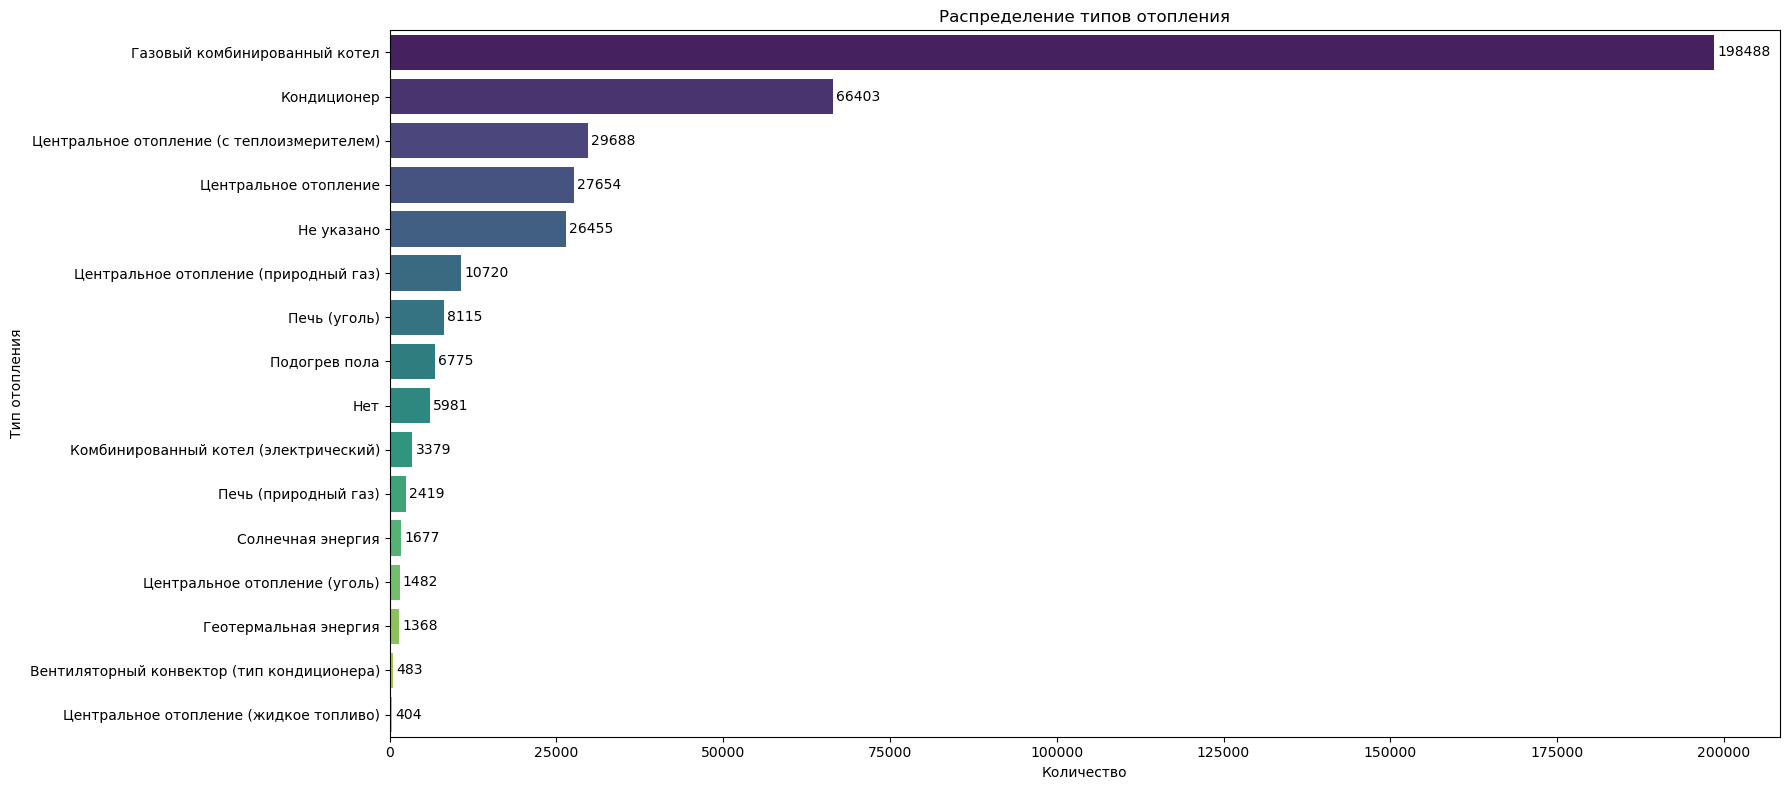

In [134]:
heating_counts = df['heating_type'].value_counts()
plt.figure(figsize=(18, 8))

sns.barplot(x=heating_counts.values, y=heating_counts.index, palette='viridis')
plt.xlabel('Количество')
plt.ylabel('Тип отопления')
plt.title('Распределение типов отопления')

# Значения
for i, v in enumerate(heating_counts.values):
    plt.text(v + 500, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

### Обработка признака, обозначающего кол-во этажей

In [135]:
df["floor_no"].unique()

array(['2', '20 и выше', 'Первый этаж', '10', '14', nan, 'Цокольный этаж',
       'Полуэтаж', 'Квартира на этаже в саду', '11', '3', '13', '7', '16',
       'Частный дом', '19', '4', '5', 'Самый верхний этаж', '8', '15',
       '1', '9', 'Пентхаус', '12', '17', '6', '18', 'Террасный этаж',
       'Подвал'], dtype=object)

In [136]:
df['floor_no'] = df['floor_no'].astype(str)
df["floor_no"].value_counts()

floor_no
2                           63958
3                           51171
1                           45702
4                           33666
nan                         33154
Цокольный этаж              29041
Частный дом                 23410
Первый этаж                 23392
5                           20683
Квартира на этаже в саду    18506
6                            9533
7                            7475
8                            5948
9                            4728
10                           3794
Пентхаус                     3475
11                           2823
12                           2261
13                           1660
20 и выше                    1522
14                           1311
15                            889
Самый верхний этаж            862
Подвал                        791
16                            583
17                            365
18                            320
Террасный этаж                282
19                            174
Полуэ

In [137]:
df['floor_no'] = df['floor_no'].replace('nan', 'Не указано')

Пропущенные значения выделяем в категорию Не указано

In [138]:
df["total_floor_count"].value_counts()

total_floor_count
4              81006
3              75767
5              68123
10-20 arası    35612
2              26942
6              22464
10             12226
7              11931
8              10922
9               8768
20 ve üzeri     6496
1               4816
Name: count, dtype: int64

In [139]:
print(df['total_floor_count'].unique())
print(df['total_floor_count'].isna().sum())

['20 ve üzeri' '1' '10-20 arası' '4' '2' '3' '8' '7' '6' '5' '10' nan '9']
26418


In [140]:
df['total_floor_count'].isna().sum()

26418

Промежуткам придаем среднее значение, убираем 'И выше'

In [141]:
def convert_total_floor_count(value):
    if isinstance(value, float)  and pd.isna(value):
        return np.nan
    value = str(value)
    if '20 ve üzeri' in value:
        return '20'
    elif '10-20 arası' in value:
        return '15'
    else:
        return value
        
df['total_floor_count'] = df['total_floor_count'].apply(convert_total_floor_count)
df['total_floor_count'] = df['total_floor_count'].fillna('-1')
df['total_floor_count'] = df['total_floor_count'].astype(int)

### Площадь жилья имеет 1/4 пропущенных значений, их удаление может серьезно повлиять на модель, поэтому заполним данный признак медианным значением по типу недвижимости и количеству комнат

In [142]:
df['size'].isna().sum()

141363

In [143]:
df['size'] = df.groupby(['sub_type', 'room_count'])['size'].transform(
    lambda x: x.fillna(x.median()))

С 1 июля 2017 года турецкими властями были внесены корректировки в сдаче и строительстве жилой недвижимости. 
Минимальная площадь жилья с планировкой 1+0 в Турции не может быть менее 28 квадратных метров, так как они считаются непригодными для комфортного проживания и полноценного отдыха. 

Для дальнейшего анализа и обучения модели установим общий фильтр на 20 м², чтобы отсечь заведомо ошибочные или нерыночные предложения.

In [144]:
df = df[df["size"] >= 20]

In [145]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
start_date,390991,2018-11-17 13:20:28.235943936,2018-08-31 00:00:00,2018-10-05 00:00:00,2018-11-12 00:00:00,2018-12-26 00:00:00,2019-02-27 00:00:00,NaN
end_date,390991,2019-01-13 18:31:23.994260736,2018-08-31 00:00:00,2018-12-09 00:00:00,2019-01-29 00:00:00,2019-02-27 00:00:00,2019-02-27 00:00:00,NaN
listing_type,390991.0,1.294508,1.0,1.0,1.0,2.0,3.0,0.467571
tom,390991.0,57.215923,0.0,29.0,40.0,90.0,180.0,44.214268
building_age,390991.0,6.379073,-1.0,0.0,2.0,8.0,40.0,8.601908
total_floor_count,390991.0,5.353571,-1.0,3.0,4.0,6.0,20.0,4.301828
room_count,390991.0,3.672394,1.0,3.0,4.0,4.0,14.0,1.148348
size,390991.0,224.47312,20.0,90.0,115.0,135.0,948235.0,7440.467477
price,390991.0,451293.629496,1.0,2500.0,200000.0,345000.0,2000000000.0,6509779.601383


Выбросы в цене и площади:
- Максимальная цена 2 млрд (скорее всего ошибка)
- Максимальная площадь 948,235 м² (слишком большое значение)
- Стандартное отклонение цены (6.5 млн) и площади (7440) огромно относительно медиан

75% объектов продаются до 90 дней

Есть объекты, которые не продаются 180 дней

Характеристики недвижимости:

Медианный возраст зданий: 2 года (значится новостройки преобладают)

Медианное количество этажей: 4 этажа

Медианное количество комнат: 4 комнаты

Медианная площадь: 115 м²

В основном объявления об продаже, а не об сдаче в аренду

In [146]:
df_max_price = df.sort_values('price', ascending=False)
df_min_price = df.sort_values('price', ascending=True)

df_max_size = df.sort_values('size', ascending=False)
df_min_size = df.sort_values('size', ascending=True)

print("Выводим топ-5 самых дорогих объектов с основными характеристиками")
print(df_max_price[['sub_type', 'listing_type', 'room_count', 'size', 'price', 'price_currency', 'address']].head(5).to_string())
print("-------------------------------------------------")
print("\nВыводим топ-5 самых дешевых объектов с основными характеристиками")
print(df_min_price[['sub_type', 'listing_type', 'room_count', 'size', 'price', 'price_currency', 'address']].head(5).to_string())
print("-------------------------------------------------")
print("\nВыводим топ-5 самых больших объектов с основными характеристиками")
print(df_max_size[['sub_type', 'listing_type', 'room_count', 'size', 'price', 'price_currency', 'address']].head(5).to_string())
print("-------------------------------------------------")
print("\nВыводим топ-5 самых маленьких объектов с основными характеристиками")
print(df_min_size[['sub_type', 'listing_type', 'room_count', 'size', 'price', 'price_currency', 'address']].head(5).to_string())

Выводим топ-5 самых дорогих объектов с основными характеристиками
                 sub_type  listing_type  room_count   size         price price_currency                         address
392156           Квартира             1           1   40.0  2.000000e+09            TRY  Mersin/Toroslar/Mithat Toroğlu
7435    Особняк / Усадьба             1          10  426.0  1.650000e+09            TRY         İstanbul/Beşiktaş/Bebek
370948  Особняк / Усадьба             1          12  417.5  1.069900e+09            USD       İstanbul/Üsküdar/Kandilli
397627           Квартира             2           4  160.0  9.999991e+08            TRY           Samsun/Atakum/Mevlana
99558          Резиденция             1           1   38.0  8.230000e+08            USD       Artvin/Kemalpaşa/Uzunyalı
-------------------------------------------------

Выводим топ-5 самых дешевых объектов с основными характеристиками
           sub_type  listing_type  room_count   size  price price_currency                       

Присутствует огромное кол-во аномальных значений, к примеру: Квартира размером 40м2 и с огромным ценником или же наоборот - квартиры с слишком маленькой ценой

Для квартир слишком большая площадь не является нормой, но для фермерского дома или же резиденции территория, которая входит в эту площадь, кажется приемлимой.

Поставим ограничения на площадь и ценники недвижимости, чтобы верно прогнозировать цены.

In [147]:
property_types = ['Квартира', 'Резиденция', 'Вилла', 'Сборный дом', 'Частный дом', 
                 'Особняк / Усадьба', 'Квартира у моря', 'Летний дом', 'Фермерский дом']

# Разделяем типы на две категории
apartment_types = ['Квартира', 'Квартира у моря', 'Сборный дом']
other_types = ['Резиденция', 'Вилла', 'Частный дом', 'Особняк / Усадьба', 'Летний дом', 'Фермерский дом']

# Удаляем записи с нереалистичными размерами
df = df[~(
    (df['sub_type'].isin(apartment_types)) & 
    ((df['size'] < 20) | (df['size'] > 10000))
)]
df = df[~(
    (df['sub_type'].isin(other_types)) & 
    ((df['size'] < 30) | (df['size'] > 2000000))
)]

# Удаляем записи, где тип в списке, но размер вообще не указан (0 или отрицательный)
df = df[~(
    (df['sub_type'].isin(property_types)) & 
    (df['size'] <= 0)
)]

Также для адекватных ценников определим среднее значение для 1м2 для любой недвижимости.

In [148]:
df['price_per_sqm'] = df['price'] / df['size']

In [149]:
df = df[df["building_age"]>=0]
df = df[df["total_floor_count"]>0]

In [150]:
df.shape

(358504, 15)

In [151]:
df.isnull().sum()

sub_type             0
start_date           0
end_date             0
listing_type         0
tom                  0
building_age         0
total_floor_count    0
floor_no             0
room_count           0
size                 0
address              0
heating_type         0
price                0
price_currency       0
price_per_sqm        0
dtype: int64

In [152]:
df = df[df['price'] > 100]

In [153]:
df.describe()

,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,price,price_per_sqm
count,356778,356778,356778.000000,356778.000000,356778.000000,356778.000000,356778.000000,356778.000000,3.567780e+05,3.567780e+05
mean,2018-11-17 07:38:32.880278272,2019-01-13 11:10:22.067504896,1.281525,57.147097,6.897981,5.806473,3.683890,159.450880,4.324073e+05,2.916400e+03
min,2018-08-31 00:00:00,2018-08-31 00:00:00,1.000000,0.000000,0.000000,1.000000,1.000000,20.000000,1.030000e+02,6.775150e-02
25%,2018-10-05 00:00:00,2018-12-09 00:00:00,1.000000,30.000000,0.000000,3.000000,3.000000,90.000000,3.000000e+03,2.800000e+01
50%,2018-11-11 00:00:00,2019-01-28 00:00:00,1.000000,40.000000,3.000000,4.000000,4.000000,116.000000,2.050000e+05,1.900000e+03
75%,2018-12-26 00:00:00,2019-02-27 00:00:00,2.000000,90.000000,13.000000,6.000000,4.000000,138.000000,3.500000e+05,2.984000e+03
max,2019-02-27 00:00:00,2019-02-27 00:00:00,3.000000,180.000000,40.000000,20.000000,14.000000,909039.000000,1.650000e+09,2.165789e+07
std,NaN,NaN,0.451231,43.942655,8.665703,4.075461,1.133689,3953.565864,5.131823e+06,4.257030e+04


## Благодаря предобработке данных были выполнены следующие улучшения:
#### 1. Очистка от некорректных записей

Удалена недвижимость с аномально малыми площадями (<20 м²)

Исключена нереалистично высокой ценой за квадратный метр (>100,000)

Удалены объекты с экстремально большими площадями (>1,000,000 м²)

#### 2. Обработка аномальных значений

Установлены разумные границы ценовых показателей

Создан новый признак - цена за квадратный метр (price_per_sqm)

#### 3. Обработка пропущенных значений

Пропущенные значения были успешно обработаны или же удалены

### В результате предобработки получен качественный датасет, свободный от выбросов и некорректных записей, что обеспечивает достоверность последующего анализа и прогноза цен.

## Визуализация данных

In [154]:
# Для перевода
column_translation = {
    'sub_type':'подтип',
    'start_date': 'начало_продажи',
    'end_date': 'конец_продажи', 
    'listing_type': 'продажа/аренда',
    'tom': 'дни_на_рынке',
    'building_age': 'возраст_здания',
    'total_floor_count': 'этажность',
    'floor_no':'этаж',
    'room_count': 'кол-во комнат',
    'size': 'площадь',
    'address':'адрес',
    'heating_type':'отопление',
    'price': 'цена',
    'price_currency':'валюта',
    'price_per_sqm': 'цена_за_м2'
}
df = df.rename(columns=column_translation)
df.head(3)

,подтип,начало_продажи,конец_продажи,продажа/аренда,дни_на_рынке,возраст_здания,этажность,этаж,кол-во комнат,площадь,адрес,отопление,цена,валюта,цена_за_м2
0,Резиденция,2018-12-10,2019-01-09,2,30,0,20,2,3,90.0,İstanbul/Kartal/Kordonboyu,Вентиляторный конвектор (тип кондиционера),3500.0,TRY,38.888889
1,Квартира,2019-02-13,2019-02-27,1,14,0,20,20 и выше,1,43.0,İstanbul/Kartal/Kordonboyu,Вентиляторный конвектор (тип кондиционера),490000.0,TRY,11395.348837
2,Квартира,2018-10-09,2018-11-08,1,30,0,1,Первый этаж,3,90.0,Tekirdağ/Çorlu/Reşadiye,Вентиляторный конвектор (тип кондиционера),155000.0,TRY,1722.222222


### Переименуем столбцы ради лучшей интерпретации

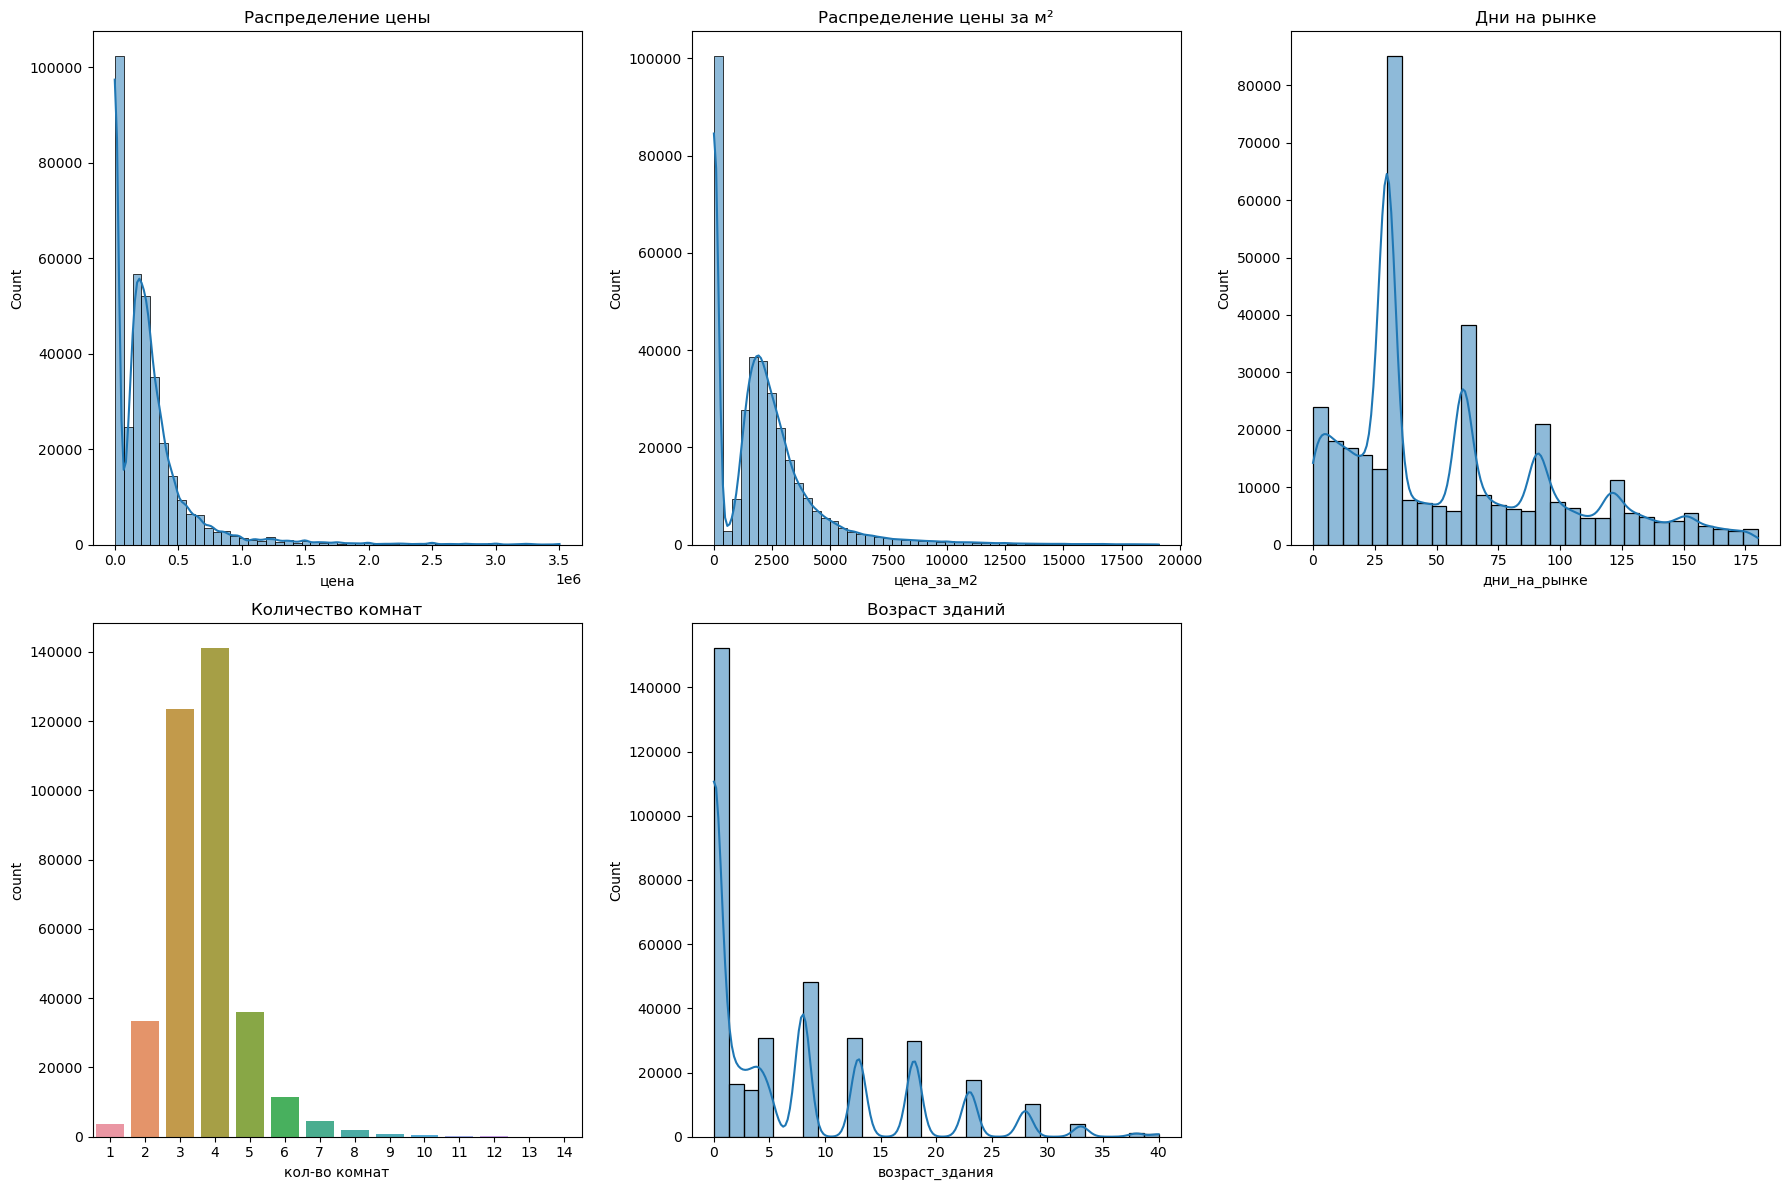

In [155]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Цена
sns.histplot(df[df['цена'] <= df['цена'].quantile(0.99)]['цена'], 
             bins=50, ax=axes[0,0], kde=True)
axes[0,0].set_title('Распределение цены')

# Цена за м² 
sns.histplot(df[df['цена_за_м2'] <= df['цена_за_м2'].quantile(0.99)]['цена_за_м2'], 
             bins=50, ax=axes[0,1], kde=True)
axes[0,1].set_title('Распределение цены за м²')

# Дни на рынке
sns.histplot(df['дни_на_рынке'], bins=30, ax=axes[0,2], kde=True)
axes[0,2].set_title('Дни на рынке')

# Количество комнат
sns.countplot(x='кол-во комнат', data=df, ax=axes[1,0])
axes[1,0].set_title('Количество комнат')

# Возраст зданий
sns.histplot(df[df['возраст_здания'] >= 0]['возраст_здания'], 
             bins=30, ax=axes[1,1], kde=True)
axes[1,1].set_title('Возраст зданий')

axes[1,2].set_visible(False)
plt.tight_layout()
plt.show()

### Выводы об распределении данных:
- Большинство объектов имеет низкую цену. Большая часть предложений имеет доступную стоимость, но есть и элитные объекты с высокой ценой


- Распределение отражает общую тенденцию, как и для цены


- Большинство объектов продаются относительно быстро. Пики могут соответствовать различным факторам, влияющим на скорость продажи (сезонность, тип недвижимости, цена и т.д.)


- Преобладают квартиры с 3-4 комнатами, что отражает структуру спроса и предложения. Кол-во жилья с большим кол-вом комнат значительно меньше


- Преобладают квартиры новостройки.

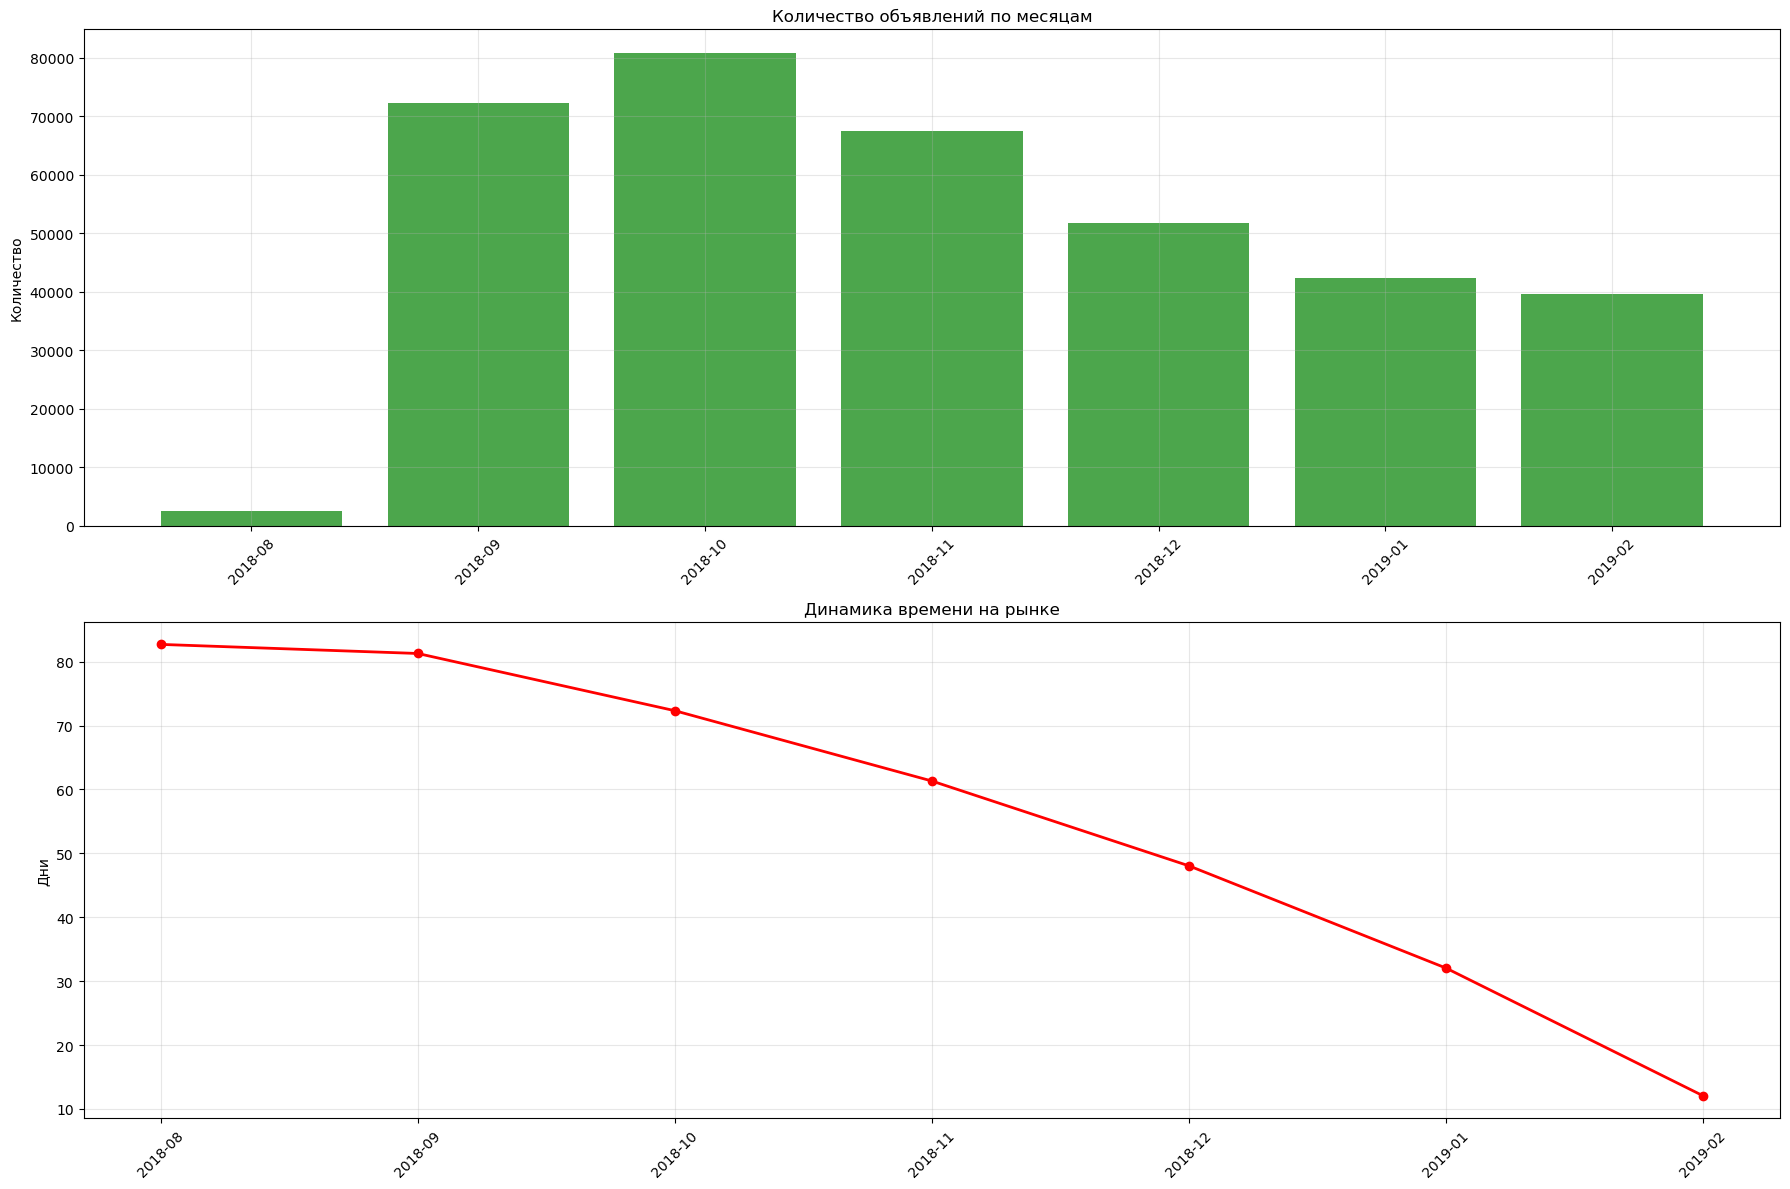

In [156]:
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

df['месяц'] = df['начало_продажи'].dt.to_period('M')
monthly_stats = df.groupby('месяц').agg({
    'цена': 'mean',
    'дни_на_рынке': 'mean'
}).reset_index()

monthly_count = df['месяц'].value_counts().sort_index()

# Количество объявлений
axes[0].bar(monthly_count.index.astype(str), monthly_count.values, color='green', alpha=0.7)
axes[0].set_title('Количество объявлений по месяцам')
axes[0].set_xticklabels(monthly_count.index.astype(str), rotation=45)
axes[0].set_ylabel('Количество')
axes[0].grid(True, alpha=0.3)

# Динамика времени на рынке
axes[1].plot(monthly_stats['месяц'].astype(str), monthly_stats['дни_на_рынке'], marker='o', color='red', linewidth=2)
axes[1].set_title('Динамика времени на рынке')
axes[1].set_xticklabels(monthly_stats['месяц'].astype(str), rotation=45)
axes[1].set_ylabel('Дни')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Динамика времени на рынке:

•  Цена имеет тенденцию к снижению в период с августа 2018 года по февраль 2019 года.

### Динамика количества объявлений по месяцам:

•  Количество объявлений значительно увеличивается с августа по октябрь 2018 года.

•  После октября 2018 года наблюдается постепенное снижение количества объявлений.

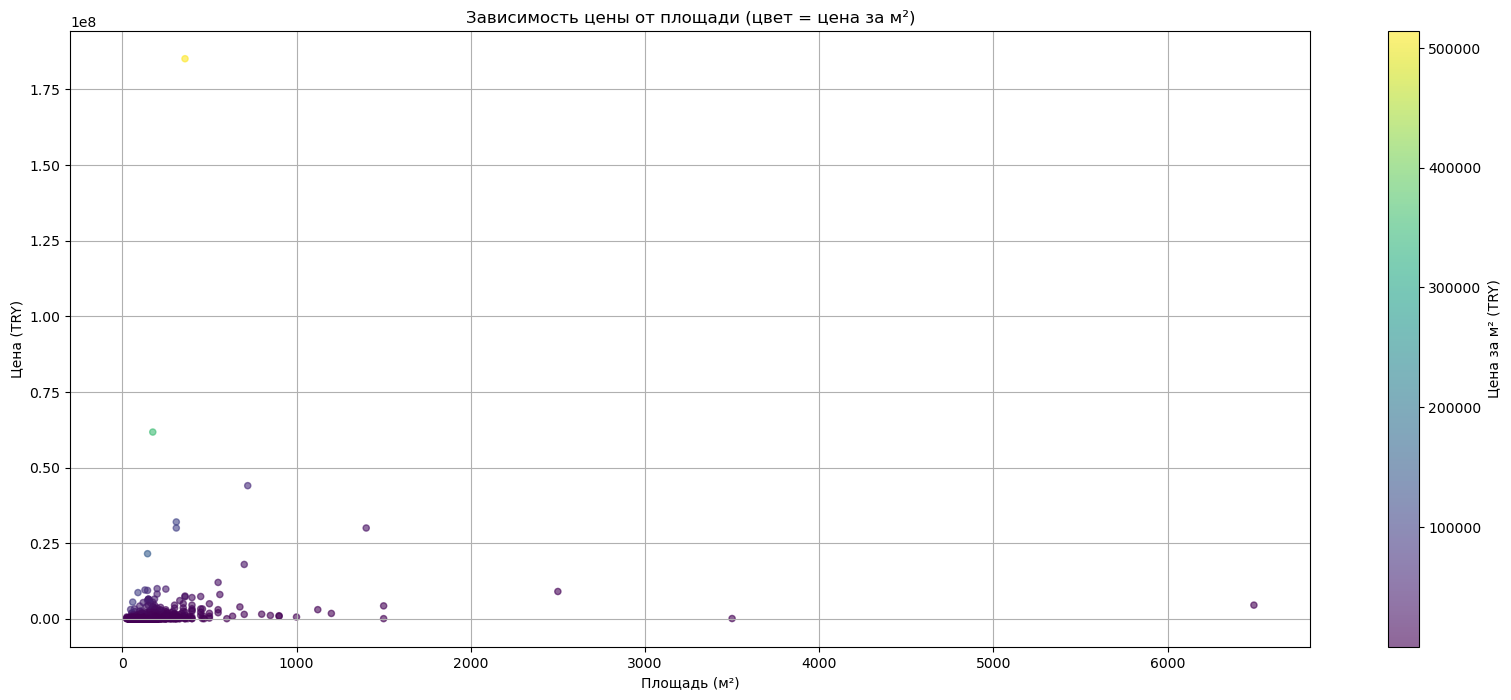

In [64]:
plt.figure(figsize=(20, 8))
sample_df = df.sample(5000)  # Берем выборку для скорости

scatter = plt.scatter(sample_df['площадь'], sample_df['цена'], 
                     c=sample_df['цена_за_м2'], cmap='viridis', 
                     alpha=0.6, s=20)
plt.colorbar(scatter, label='Цена за м² (TRY)')
plt.title('Зависимость цены от площади (цвет = цена за м²)')
plt.xlabel('Площадь (м²)')
plt.ylabel('Цена (TRY)')
plt.grid(True)
plt.show()

•  Зависимость цены от площади: увеличение цены объекта с увеличением площади. Есть значительный разброс данных.

•  Большая часть объектов представлена в диапазоне площадей до 1000 м². Есть несколько крупных объектов с площадями от 2000 до 7000 м².

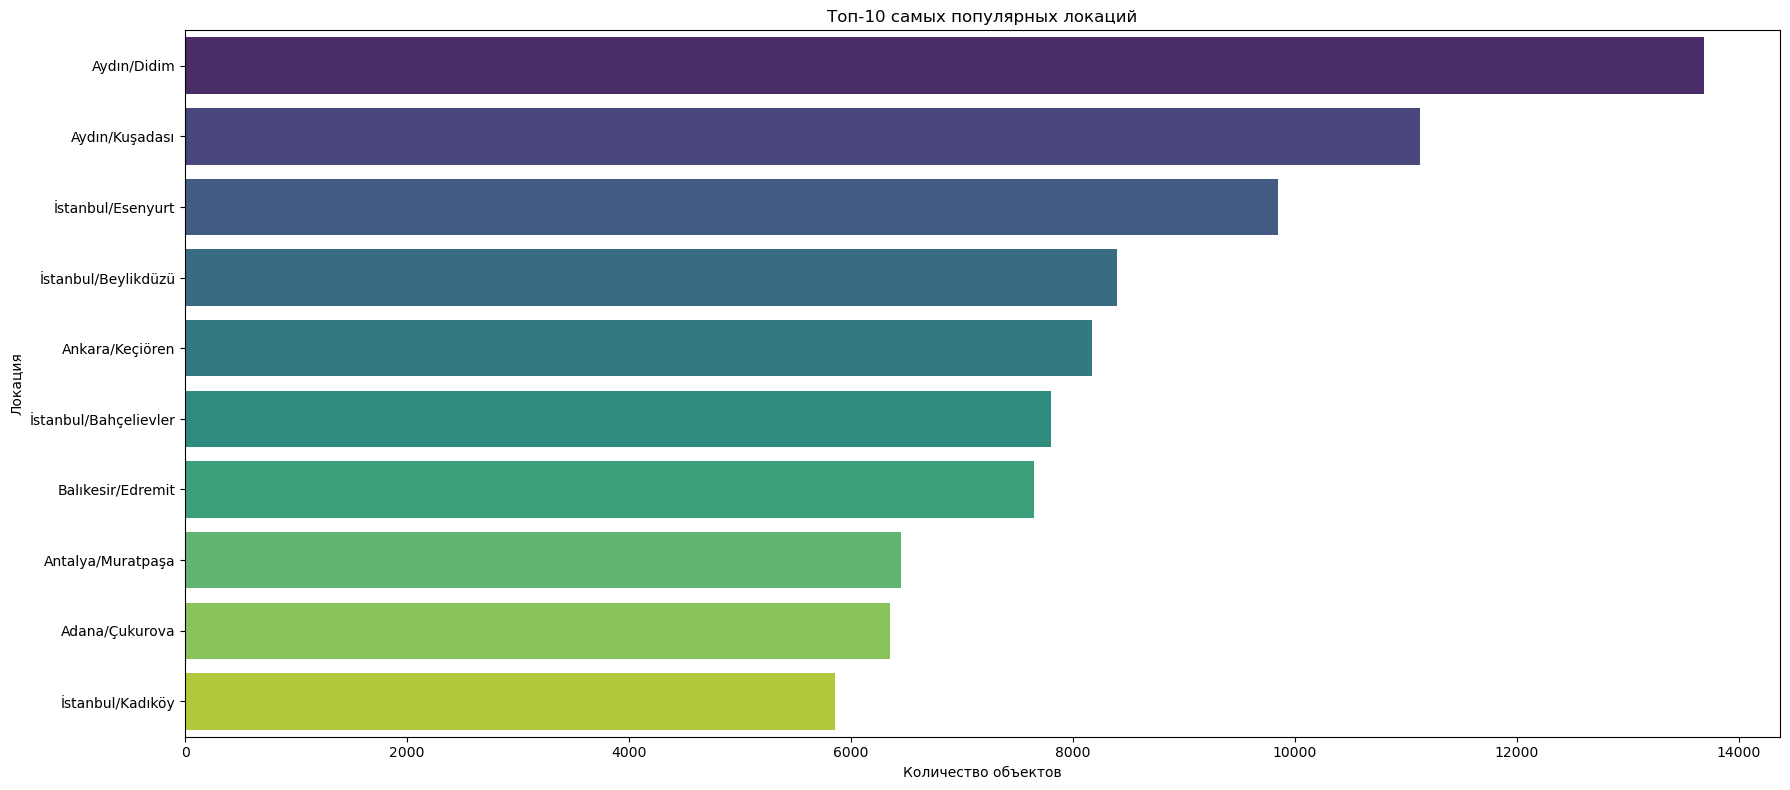

In [65]:
if 'адрес' in df.columns:
    plt.figure(figsize=(18, 8))
    df['город_район'] = df['адрес'].str.split('/').str[0:2].str.join('/')
    top_locations = df['город_район'].value_counts().head(10)
    
    sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')
    plt.title('Топ-10 самых популярных локаций')
    plt.xlabel('Количество объектов')
    plt.ylabel('Локация')
    plt.tight_layout()
    plt.show()

    Районы Стамбула, обладая значительным населением и экономическим потенциалом, демонстрируют активное строительство и предлагают разнообразный выбор жилья. Курортные города, в свою очередь, привлекают покупателей, желающих приобрести жилье для отдыха и инвестиций.

In [105]:

# data_region = {'адрес': ['İstanbul/Kartal', 'İstanbul/Beşiktaş', 'İstanbul/Maltepe',
#        'Çanakkale/Ayvacık', 'İstanbul/Fatih', 'Muğla/Bodrum',
#        'İstanbul/Şişli', 'Balıkesir/Edremit', 'Çanakkale/Merkez',
#        'Balıkesir/Gömeç', 'İzmir/Karaburun', 'İstanbul/Beykoz',
#        'İzmir/Güzelbahçe', 'İzmir/Menemen', 'İzmir/Urla',
#        'İstanbul/Sarıyer', 'İzmir/Seferihisar', 'Balıkesir/Ayvalık',
#        'Ankara/Çankaya', 'KKTC/Gazimağusa', 'İstanbul/Bakırköy',
#        'Aydın/Efeler', 'Antalya/Aksu', 'İzmir/Çeşme', 'Ankara/Elmadağ',
#        'İstanbul/Sultangazi', 'Mersin/Erdemli', 'İzmir/Dikili',
#        'İstanbul/Kadıköy', 'Balıkesir/Karesi', 'Adana/Yüreğir',
#        'Balıkesir/Burhaniye', 'Muğla/Ula', 'Muğla/Marmaris',
#        'Mersin/Yenişehir', 'İstanbul/Büyükçekmece', 'Mersin/Toroslar',
#        'İstanbul/Zeytinburnu', 'Gaziantep/Şahinbey', 'Tekirdağ/Çorlu',
#        'Eskişehir/Odunpazarı', 'Muğla/Köyceğiz', 'İzmir/Bayraklı',
#        'Antalya/Döşemealtı', 'İzmir/Karşıyaka', 'Muğla/Datça',
#        'İstanbul/Pendik', 'Aydın/Kuşadası', 'İstanbul/Başakşehir',
#        'Antalya/Serik', 'Aydın/Nazilli', 'Samsun/Atakum',
#        'Samsun/İlkadım', 'İstanbul/Güngören', 'İstanbul/Silivri',
#        'Kocaeli/Gebze', 'Aydın/Didim', 'İzmir/Foça', 'Adıyaman/Merkez',
#        'İstanbul/Adalar', 'Bursa/Gemlik', 'Antalya/Alanya',
#        'Adana/Sarıçam', 'Antalya/Muratpaşa', 'İstanbul/Bağcılar',
#        'Tekirdağ/Çerkezköy', 'Kayseri/Kocasinan', 'Adana/Seyhan',
#        'Mersin/Silifke', 'Adana/Çukurova', 'İzmir/Bornova',
#        'Çanakkale/Biga', 'Ankara/Bala', 'Erzincan/Refahiye',
#        'Kırklareli/Lüleburgaz', 'Bursa/Nilüfer', 'Tekirdağ/Süleymanpaşa',
#        'Giresun/Merkez', 'Ankara/Pursaklar', 'Manisa/Turgutlu',
#        'İzmir/Buca', 'İzmir/Torbalı', 'İzmir/Konak', 'Mersin/Mezitli',
#        'İstanbul/Bahçelievler', 'Trabzon/Ortahisar', 'Bursa/Orhangazi',
#        'İstanbul/Çatalca', 'Yalova/Çınarcık', 'Tokat/Merkez',
#        'Muğla/Menteşe', 'Kocaeli/Kartepe', 'Kocaeli/Derince',
#        'Antalya/Kepez', 'Kocaeli/İzmit', 'Antalya/Konyaaltı',
#        'Tekirdağ/Marmaraereğlisi', 'Malatya/Akçadağ', 'Manisa/Şehzadeler',
#        'Bolu/Mengen', 'Aydın/Söke', 'Sakarya/Kocaali', 'Muğla/Fethiye',
#        'İzmir/Bergama', 'Sakarya/Serdivan', 'İstanbul/Tuzla',
#        'İzmir/Menderes', 'Çankırı/Çerkeş', 'Sakarya/Karasu',
#        'Balıkesir/Bandırma', 'Burdur/Bucak', 'Bursa/Osmangazi',
#        'İzmir/Karabağlar', 'Elazığ/Merkez', 'Edirne/Keşan',
#        'İstanbul/Beyoğlu', 'İzmir/Çiğli', 'Bursa/Karacabey',
#        'Tekirdağ/Saray', 'Denizli/Pamukkale', 'Bursa/Yıldırım',
#        'Kayseri/Melikgazi', 'Eskişehir/Sivrihisar', 'Tekirdağ/Şarköy',
#        'İzmir/Kemalpaşa', 'Kastamonu/Merkez', 'İzmir/Gaziemir',
#        'Adana/Ceyhan', 'Kocaeli/Darıca', 'Isparta/Merkez',
#        'Çanakkale/Gelibolu', 'Bursa/Mudanya', 'Bilecik/Bozüyük',
#        'Bilecik/Yenipazar', 'KKTC/İskele', 'İzmir/Tire', 'Düzce/Akçakoca',
#        'Çanakkale/Ezine', 'Çanakkale/Bayramiç', 'Manisa/Yunusemre',
#        'Çanakkale/Eceabat', 'Muğla/Dalaman', 'Mersin/Tarsus',
#        'İzmir/Selçuk', 'Muğla/Milas', 'Sakarya/Adapazarı',
#        'Isparta/Eğirdir', 'Kahramanmaraş/Dulkadiroğlu',
#        'İstanbul/Çekmeköy', 'Antalya/Korkuteli', 'İzmir/Narlıdere',
#        'İstanbul/Küçükçekmece', 'Malatya/Battalgazi',
#        'Şanlıurfa/Karaköprü', 'Kocaeli/Kandıra', 'Çanakkale/Yenice',
#        'Antalya/Manavgat', 'Balıkesir/Erdek', 'Samsun/19 Mayıs',
#        'Niğde/Merkez', 'İstanbul/Avcılar', 'Yalova/Çiftlikköy',
#        'Kocaeli/Dilovası', 'Manisa/Akhisar', 'KKTC/Lefkoşa',
#        'Malatya/Yeşilyurt', 'Manisa/Salihli', 'İzmir/Aliağa',
#        'Gaziantep/Oğuzeli', 'Osmaniye/Merkez', 'Konya/Selçuklu',
#        'İzmir/Balçova', 'Trabzon/Akçaabat', 'Yalova/Armutlu',
#        'Manisa/Ahmetli', 'İstanbul/Esenler', 'Mersin/Akdeniz',
#        'Manisa/Saruhanlı', 'Antalya/Kemer', 'Aydın/İncirliova',
#        'KKTC/Girne', 'Aksaray/Merkez', 'Muğla/Ortaca', 'Mersin/Gülnar',
#        'Rize/Ardeşen', 'Adana/Aladağ', 'Ankara/Keçiören',
#        'Eskişehir/Tepebaşı', 'Niğde/Bor', 'Kırklareli/Demirköy',
#        'Sinop/Merkez', 'Mardin/Artuklu', 'Gaziantep/Şehitkamil',
#        'Samsun/Canik', 'Antalya/Gazipaşa', 'Kocaeli/Karamürsel',
#        'İstanbul/Arnavutköy', 'Yalova/Merkez', 'Kocaeli/Gölcük',
#        'Ankara/Mamak', 'İstanbul/Beylikdüzü', 'Ankara/Etimesgut',
#        'Kocaeli/Başiskele', 'İstanbul/Esenyurt', 'Ankara/Altındağ',
#        'İstanbul/Ümraniye', 'Yozgat/Sorgun', 'Edirne/İpsala',
#        'Uşak/Merkez', 'Kütahya/Merkez', 'Konya/Karatay',
#        'Kahramanmaraş/Onikişubat', 'Yozgat/Merkez', 'İzmir/Ödemiş',
#        'Ankara/Yenimahalle', 'Sakarya/Sapanca', 'İstanbul/Üsküdar',
#        'Ankara/Sincan', 'Mardin/Kızıltepe', 'Düzce/Merkez',
#        'Edirne/Merkez', 'Karaman/Merkez', 'Bolu/Merkez',
#        'Yalova/Altınova', 'Ankara/Çubuk', 'Erzurum/Palandöken',
#        'İstanbul/Şile', 'İstanbul/Eyüpsultan', 'Sakarya/Hendek',
#        'İstanbul/Ataşehir', 'Konya/Meram', 'Kırklareli/Merkez',
#        'İstanbul/Sancaktepe', 'Sivas/Merkez', 'Sakarya/Arifiye',
#        'Erzurum/Yakutiye', 'Afyonkarahisar/Merkez', 'Kayseri/Talas',
#        'Sakarya/Erenler', 'Bilecik/Merkez', 'Ankara/Gölbaşı',
#        'Kocaeli/Körfez', 'Osmaniye/Kadirli', 'Erzurum/Oltu',
#        'Kırşehir/Merkez', 'Kilis/Merkez', 'Düzce/Gümüşova',
#        'Bursa/Mustafakemalpaşa', 'Tekirdağ/Ergene', 'Kocaeli/Çayırova',
#        'İstanbul/Bayrampaşa', 'Ordu/Fatsa', 'Ankara/Polatlı',
#        'Rize/Merkez', 'Denizli/Merkezefendi', 'Tekirdağ/Muratlı',
#        'Ordu/Altınordu', 'Kars/Merkez', 'İstanbul/Gaziosmanpaşa',
#        'Düzce/Kaynaşlı', 'Hatay/Antakya', 'Çorum/Merkez',
#        'Kırıkkale/Merkez', 'Bursa/İnegöl', 'Karabük/Merkez',
#        'Bursa/Yenişehir', 'Batman/Merkez', 'İstanbul/Kağıthane',
#        'Erzurum/Aziziye', 'Zonguldak/Ereğli', 'İstanbul/Sultanbeyli',
#        'Samsun/Çarşamba', 'Bursa/İznik', 'Konya/Akşehir', 'Bursa/Kestel',
#        'Denizli/Güney', 'Amasya/Merkez', 'Gümüşhane/Merkez',
#        'Çanakkale/Lapseki', 'Adıyaman/Kahta', 'Bingöl/Merkez',
#        'Balıkesir/Altıeylül', 'Isparta/Atabey', 'Nevşehir/Merkez',
#        'Trabzon/Araklı', 'Sakarya/Akyazı', 'Düzce/Cumayeri',
#        'Burdur/Merkez', 'Zonguldak/Merkez', 'Sivas/Yıldızeli',
#        'Samsun/Tekkeköy', 'Sakarya/Ferizli', 'Kırklareli/Babaeski',
#        'Karaman/Ermenek', 'Şanlıurfa/Haliliye', 'Nevşehir/Ürgüp',
#        'Artvin/Merkez', 'Ardahan/Merkez', 'Samsun/Bafra',
#        'Balıkesir/Gönen', 'Manisa/Alaşehir', 'Kastamonu/Cide',
#        'Giresun/Bulancak', 'Trabzon/Sürmene', 'Afyonkarahisar/İhsaniye',
#        'Edirne/Uzunköprü', 'Uşak/Eşme', 'Kayseri/Develi', 'Samsun/Kavak',
#        'Ordu/Perşembe', 'Trabzon/Yomra', 'Hatay/Defne',
#        'Afyonkarahisar/Şuhut', 'Zonguldak/Devrek', 'Burdur/Ağlasun',
#        'Giresun/Görele', 'Giresun/Tirebolu', 'Sakarya/Geyve',
#        'Konya/Ereğli', 'Rize/Pazar', 'Isparta/Yalvaç', 'Artvin/Arhavi',
#        'Balıkesir/Susurluk', 'Trabzon/Arsin', 'Rize/Çayeli',
#        'Aydın/Germencik', 'Hatay/İskenderun', 'Hatay/Arsuz',
#        'Hatay/Dörtyol', 'Edirne/Enez', 'Tekirdağ/Kapaklı', 'Adana/Kozan',
#        'Adana/Pozantı', 'Denizli/Çameli', 'Muğla/Seydikemer',
#        'Sakarya/Karapürçek', 'Antalya/Kaş', 'Antalya/Finike',
#        'Antalya/Kumluca', 'Aksaray/Güzelyurt', 'Adana/Yumurtalık',
#        'Mersin/Bozyazı', 'Muğla/Yatağan', 'İzmir/Bayındır',
#        'Bartın/Merkez', 'Mersin/Anamur', 'KKTC/Güzelyurt', 'Denizli/Kale',
#        'Balıkesir/Marmara', 'Diyarbakır/Kayapınar', 'Aydın/Kuyucak',
#        'Çanakkale/Gökçeada', 'Trabzon/Of', 'Adana/İmamoğlu',
#        'Aydın/Sultanhisar', 'Adana/Karataş', 'Niğde/Ulukışla',
#        'Bursa/Gürsu', 'Eskişehir/Beylikova', 'Kayseri/Hacılar',
#        'Ankara/Akyurt', 'Yalova/Termal', 'Kırıkkale/Yahşihan',
#        'Sakarya/Pamukova', 'Kırıkkale/Bahşili', 'Van/İpekyolu',
#        'Kayseri/İncesu', 'Çanakkale/Çan', 'Tokat/Zile',
#        'Trabzon/Vakfıkebir', 'Osmaniye/Toprakkale', 'Erzincan/Merkez',
#        'Afyonkarahisar/Emirdağ', 'Diyarbakır/Bağlar',
#        'Kayseri/Yeşilhisar', 'Sakarya/Söğütlü', 'Gümüşhane/Kelkit',
#        'Hatay/Erzin', 'Trabzon/Beşikdüzü', 'Ankara/Kahramankazan',
#        'Ordu/Ünye', 'Konya/Ilgın', 'Düzce/Gölyaka', 'Edirne/Havsa',
#        'Yozgat/Yerköy', 'Şırnak/Cizre', 'Düzce/Çilimli',
#        'Ankara/Kızılcahamam', 'Kütahya/Emet', 'Afyonkarahisar/Sandıklı',
#        'Osmaniye/Bahçe', 'Eskişehir/Günyüzü', 'Amasya/Merzifon',
#        'Kastamonu/Devrekani', 'İzmir/Kınık', 'Çorum/Osmancık',
#        'Gaziantep/Nizip', 'Van/Tuşba', 'Hatay/Belen', 'Zonguldak/Alaplı',
#        'Eskişehir/İnönü', 'Kastamonu/Taşköprü', 'Tekirdağ/Malkara',
#        'Samsun/Terme', 'Denizli/Acıpayam', 'Zonguldak/Kozlu',
#        'Samsun/Havza', 'Hatay/Kırıkhan', 'Siirt/Merkez', 'Adıyaman/Besni',
#        'Bilecik/Osmaneli', 'Mardin/Midyat', 'Çorum/Alaca',
#        'Karabük/Safranbolu', 'Denizli/Buldan', 'Malatya/Doğanşehir',
#        'Denizli/Sarayköy', 'Bartın/Amasra', 'Muş/Merkez',
#        'Çankırı/Merkez', 'Bitlis/Tatvan', 'Balıkesir/Bigadiç',
#        'Kayseri/Bünyan', 'Nevşehir/Gülşehir', 'Kastamonu/Daday',
#        'Şanlıurfa/Eyyübiye', 'Gaziantep/İslahiye', 'Balıkesir/Havran',
#        'Şanlıurfa/Viranşehir', 'Kahramanmaraş/Türkoğlu',
#        'Yozgat/Akdağmadeni', 'Artvin/Hopa', 'Bolu/Göynük',
#        'Diyarbakır/Yenişehir', 'Iğdır/Merkez', 'Kars/Sarıkamış',
#        'Hakkari/Merkez', 'Antalya/Demre', 'Ağrı/Merkez', 'Bayburt/Merkez',
#        'Kırşehir/Akçakent', 'Tokat/Almus', 'Yozgat/Boğazlıyan',
#        'Nevşehir/Kozaklı', 'Tunceli/Merkez', 'Zonguldak/Çaycuma',
#        'Trabzon/Maçka', 'Şırnak/Merkez', 'Bilecik/Pazaryeri',
#        'Kırklareli/Vize', 'Bitlis/Merkez', 'Kahramanmaraş/Elbistan',
#        'Yozgat/Şefaatli', 'Afyonkarahisar/Dazkırı', 'Edirne/Lalapaşa',
#        'Van/Edremit', 'Balıkesir/İvrindi', 'Sakarya/Kaynarca',
#        'Denizli/Bozkurt', 'Tokat/Turhal', 'Ordu/Kabadüz',
#        'Erzincan/Üzümlü', 'Eskişehir/Mahmudiye', 'Eskişehir/Mihalgazi',
#        'Kırklareli/Pınarhisar', 'Çorum/Oğuzlar', 'Manisa/Kula',
#        'Niğde/Çamardı', 'Bursa/Büyükorhan', 'Kastamonu/Azdavay',
#        'Çankırı/Korgun', 'Bartın/Kurucaşile', 'Trabzon/Çarşıbaşı',
#        'Çanakkale/Bozcaada', 'Kastamonu/Küre', 'Ankara/Kalecik',
#        'Ordu/Kumru', 'Bursa/Keles', 'Çorum/Kargı', 'Ankara/Ayaş',
#        'Aksaray/Sultanhanı', 'Erzurum/Uzundere', 'Sakarya/Taraklı',
#        'Ağrı/Patnos', 'Konya/Güneysınır', 'Bolu/Mudurnu',
#        'Kahramanmaraş/Pazarcık', 'Osmaniye/Hasanbeyli', 'Batman/Kozluk',
#        'Rize/Fındıklı', 'Ankara/Güdül', 'Eskişehir/Sarıcakaya',
#        'Kütahya/Domaniç', 'Antalya/Akseki', 'Samsun/Alaçam',
#        'Manisa/Soma', 'Aydın/Karacasu', 'Çorum/Sungurlu',
#        'Diyarbakır/Ergani', 'Denizli/Serinhisar', 'Kahramanmaraş/Afşin',
#        'Şanlıurfa/Hilvan', 'Denizli/Babadağ', 'Balıkesir/Manyas',
#        'Düzce/Yığılca', 'Giresun/Çanakçı', 'Samsun/Yakakent',
#        'Amasya/Suluova', 'Konya/Bozkır', 'Konya/Seydişehir',
#        'Balıkesir/Dursunbey', 'Aydın/Koçarlı', 'Osmaniye/Sumbas',
#        'Denizli/Çardak', 'Adana/Tufanbeyli', 'Erzurum/Horasan',
#        'Diyarbakır/Dicle', 'Ankara/Beypazarı', 'Burdur/Çavdır', 'Kocaeli',
#        'Denizli/Tavas', 'Ordu/Gürgentepe', 'Konya/Akören',
#        'Mersin/Aydıncık']}

# df_regs = pd.DataFrame(data_region)

# # Словарь с координатами для всех городов и районов
# coordinates_dict = {
#     'İstanbul/Kartal': (40.910, 29.210),
#     'İstanbul/Beşiktaş': (41.055, 29.000),
#     'İstanbul/Maltepe': (40.950, 29.115),
#     'Çanakkale/Ayvacık': (39.601, 26.404),
#     'İstanbul/Fatih': (41.008, 28.974),
#     'Muğla/Bodrum': (37.038, 27.429),
#     'İstanbul/Şişli': (41.068, 29.001),
#     'Balıkesir/Edremit': (39.596, 27.024),
#     'Çanakkale/Merkez': (40.147, 26.406),
#     'Balıkesir/Gömeç': (39.393, 26.840),
#     'İzmir/Karaburun': (38.638, 26.502),
#     'İstanbul/Beykoz': (41.140, 29.095),
#     'İzmir/Güzelbahçe': (38.374, 26.898),
#     'İzmir/Menemen': (38.608, 27.069),
#     'İzmir/Urla': (38.322, 26.765),
#     'İstanbul/Sarıyer': (41.111, 29.034),
#     'İzmir/Seferihisar': (38.198, 26.839),
#     'Balıkesir/Ayvalık': (39.317, 26.695),
#     'Ankara/Çankaya': (39.888, 32.862),
#     'KKTC/Gazimağusa': (35.125, 33.950),
#     'İstanbul/Bakırköy': (40.991, 28.832),
#     'Aydın/Efeler': (37.844, 27.846),
#     'Antalya/Aksu': (36.956, 30.849),
#     'İzmir/Çeşme': (38.323, 26.305),
#     'Ankara/Elmadağ': (39.921, 33.231),
#     'İstanbul/Sultangazi': (41.215, 28.684),
#     'Mersin/Erdemli': (36.605, 34.308),
#     'İzmir/Dikili': (39.071, 26.889),
#     'İstanbul/Kadıköy': (40.981, 29.052),
#     'Balıkesir/Karesi': (39.633, 27.883),
#     'Adana/Yüreğir': (37.000, 35.333),
#     'Balıkesir/Burhaniye': (39.500, 26.983),
#     'Muğla/Ula': (37.105, 28.417),
#     'Muğla/Marmaris': (36.855, 28.274),
#     'Mersin/Yenişehir': (36.800, 34.567),
#     'İstanbul/Büyükçekmece': (41.024, 28.576),
#     'Mersin/Toroslar': (36.850, 34.883),
#     'İstanbul/Zeytinburnu': (40.988, 28.904),
#     'Gaziantep/Şahinbey': (37.067, 37.383),
#     'Tekirdağ/Çorlu': (41.159, 27.800),
#     'Eskişehir/Odunpazarı': (39.767, 30.517),
#     'Muğla/Köyceğiz': (36.971, 28.683),
#     'İzmir/Bayraklı': (38.467, 27.167),
#     'Antalya/Döşemealtı': (36.917, 30.600),
#     'İzmir/Karşıyaka': (38.467, 27.117),
#     'Muğla/Datça': (36.733, 27.683),
#     'İstanbul/Pendik': (40.877, 29.233),
#     'Aydın/Kuşadası': (37.860, 27.257),
#     'İstanbul/Başakşehir': (41.083, 28.800),
#     'Antalya/Serik': (36.917, 31.100),
#     'Aydın/Nazilli': (37.912, 28.321),
#     'Samsun/Atakum': (41.283, 36.333),
#     'Samsun/İlkadım': (41.283, 36.333),
#     'İstanbul/Güngören': (41.017, 28.883),
#     'İstanbul/Silivri': (41.073, 28.246),
#     'Kocaeli/Gebze': (40.800, 29.433),
#     'Aydın/Didim': (37.376, 27.267),
#     'İzmir/Foça': (38.667, 26.750),
#     'Adıyaman/Merkez': (37.764, 38.276),
#     'İstanbul/Adalar': (40.867, 29.117),
#     'Bursa/Gemlik': (40.433, 29.150),
#     'Antalya/Alanya': (36.543, 31.999),
#     'Adana/Sarıçam': (37.000, 35.333),
#     'Antalya/Muratpaşa': (36.883, 30.700),
#     'İstanbul/Bağcılar': (41.033, 28.850),
#     'Tekirdağ/Çerkezköy': (41.283, 27.983),
#     'Kayseri/Kocasinan': (38.733, 35.483),
#     'Adana/Seyhan': (37.000, 35.321),
#     'Mersin/Silifke': (36.377, 33.934),
#     'Adana/Çukurova': (37.000, 35.333),
#     'İzmir/Bornova': (38.467, 27.217),
#     'Çanakkale/Biga': (40.228, 27.242),
#     'Ankara/Bala': (39.554, 33.123),
#     'Erzincan/Refahiye': (39.893, 38.767),
#     'Kırklareli/Lüleburgaz': (41.405, 27.356),
#     'Bursa/Nilüfer': (40.283, 28.983),
#     'Tekirdağ/Süleymanpaşa': (40.983, 27.517),
#     'Giresun/Merkez': (40.917, 38.390),
#     'Ankara/Pursaklar': (40.039, 32.911),
#     'Manisa/Turgutlu': (38.500, 27.700),
#     'İzmir/Buca': (38.383, 27.167),
#     'İzmir/Torbalı': (38.150, 27.350),
#     'İzmir/Konak': (38.417, 27.133),
#     'Mersin/Mezitli': (36.750, 34.533),
#     'İstanbul/Bahçelievler': (41.000, 28.850),
#     'Trabzon/Ortahisar': (41.000, 39.733),
#     'Bursa/Orhangazi': (40.489, 29.308),
#     'İstanbul/Çatalca': (41.143, 28.461),
#     'Yalova/Çınarcık': (40.645, 29.120),
#     'Tokat/Merkez': (40.323, 36.554),
#     'Muğla/Menteşe': (37.215, 28.362),
#     'Kocaeli/Kartepe': (40.752, 30.216),
#     'Kocaeli/Derince': (40.756, 29.815),
#     'Antalya/Kepez': (36.883, 30.700),
#     'Kocaeli/İzmit': (40.765, 29.940),
#     'Antalya/Konyaaltı': (36.883, 30.650),
#     'Tekirdağ/Marmaraereğlisi': (40.970, 27.955),
#     'Malatya/Akçadağ': (38.339, 37.970),
#     'Manisa/Şehzadeler': (38.617, 27.433),
#     'Bolu/Mengen': (40.938, 32.076),
#     'Aydın/Söke': (37.748, 27.406),
#     'Sakarya/Kocaali': (41.050, 30.850),
#     'Muğla/Fethiye': (36.621, 29.116),
#     'İzmir/Bergama': (39.120, 27.180),
#     'Sakarya/Serdivan': (40.767, 30.367),
#     'İstanbul/Tuzla': (40.817, 29.300),
#     'İzmir/Menderes': (38.250, 27.133),
#     'Çankırı/Çerkeş': (40.811, 32.893),
#     'Sakarya/Karasu': (41.100, 30.683),
#     'Balıkesir/Bandırma': (40.352, 27.970),
#     'Burdur/Bucak': (37.459, 30.595),
#     'Bursa/Osmangazi': (40.183, 29.067),
#     'İzmir/Karabağlar': (38.367, 27.100),
#     'Elazığ/Merkez': (38.675, 39.223),
#     'Edirne/Keşan': (40.856, 26.630),
#     'İstanbul/Beyoğlu': (41.035, 28.977),
#     'İzmir/Çiğli': (38.500, 27.067),
#     'Bursa/Karacabey': (40.213, 28.361),
#     'Tekirdağ/Saray': (41.444, 27.921),
#     'Denizli/Pamukkale': (37.917, 29.117),
#     'Bursa/Yıldırım': (40.183, 29.083),
#     'Kayseri/Melikgazi': (38.733, 35.483),
#     'Eskişehir/Sivrihisar': (39.450, 31.534),
#     'Tekirdağ/Şarköy': (40.611, 27.112),
#     'İzmir/Kemalpaşa': (38.433, 27.417),
#     'Kastamonu/Merkez': (41.378, 33.776),
#     'İzmir/Gaziemir': (38.317, 27.100),
#     'Adana/Ceyhan': (37.028, 35.817),
#     'Kocaeli/Darıca': (40.767, 29.383),
#     'Isparta/Merkez': (37.764, 30.556),
#     'Çanakkale/Gelibolu': (40.407, 26.671),
#     'Bursa/Mudanya': (40.375, 28.882),
#     'Bilecik/Bozüyük': (39.907, 30.037),
#     'Bilecik/Yenipazar': (40.178, 30.520),
#     'KKTC/İskele': (35.300, 33.883),
#     'İzmir/Tire': (38.088, 27.735),
#     'Düzce/Akçakoca': (41.086, 31.116),
#     'Çanakkale/Ezine': (39.785, 26.340),
#     'Çanakkale/Bayramiç': (39.808, 26.609),
#     'Manisa/Yunusemre': (38.617, 27.433),
#     'Çanakkale/Eceabat': (40.184, 26.357),
#     'Muğla/Dalaman': (36.765, 28.803),
#     'Mersin/Tarsus': (36.918, 34.878),
#     'İzmir/Selçuk': (37.951, 27.368),
#     'Muğla/Milas': (37.316, 27.784),
#     'Sakarya/Adapazarı': (40.777, 30.400),
#     'Isparta/Eğirdir': (37.874, 30.850),
#     'Kahramanmaraş/Dulkadiroğlu': (37.583, 36.933),
#     'İstanbul/Çekmeköy': (41.033, 29.183),
#     'Antalya/Korkuteli': (37.065, 30.195),
#     'İzmir/Narlıdere': (38.383, 27.000),
#     'İstanbul/Küçükçekmece': (41.000, 28.800),
#     'Malatya/Battalgazi': (38.422, 38.365),
#     'Şanlıurfa/Karaköprü': (37.183, 38.783),
#     'Kocaeli/Kandıra': (41.067, 30.150),
#     'Çanakkale/Yenice': (39.831, 27.258),
#     'Antalya/Manavgat': (36.787, 31.443),
#     'Balıkesir/Erdek': (40.399, 27.793),
#     'Samsun/19 Mayıs': (41.500, 36.083),
#     'Niğde/Merkez': (37.966, 34.679),
#     'İstanbul/Avcılar': (40.979, 28.714),
#     'Yalova/Çiftlikköy': (40.660, 29.324),
#     'Kocaeli/Dilovası': (40.779, 29.535),
#     'Manisa/Akhisar': (38.918, 27.837),
#     'KKTC/Lefkoşa': (35.185, 33.382),
#     'Malatya/Yeşilyurt': (38.295, 38.248),
#     'Manisa/Salihli': (38.483, 28.139),
#     'İzmir/Aliağa': (38.800, 26.972),
#     'Gaziantep/Oğuzeli': (36.965, 37.513),
#     'Osmaniye/Merkez': (37.074, 36.247),
#     'Konya/Selçuklu': (37.871, 32.484),
#     'İzmir/Balçova': (38.383, 27.050),
#     'Trabzon/Akçaabat': (41.021, 39.571),
#     'Yalova/Armutlu': (40.520, 29.160),
#     'Manisa/Ahmetli': (38.519, 27.938),
#     'İstanbul/Esenler': (41.067, 28.867),
#     'Mersin/Akdeniz': (36.800, 34.633),
#     'Manisa/Saruhanlı': (38.733, 27.567),
#     'Antalya/Kemer': (36.600, 30.560),
#     'Aydın/İncirliova': (37.852, 27.723),
#     'KKTC/Girne': (35.342, 33.317),
#     'Aksaray/Merkez': (38.368, 34.030),
#     'Muğla/Ortaca': (36.838, 28.764),
#     'Mersin/Gülnar': (36.341, 33.400),
#     'Rize/Ardeşen': (41.191, 40.987),
#     'Adana/Aladağ': (37.550, 35.400),
#     'Ankara/Keçiören': (39.967, 32.867),
#     'Eskişehir/Tepebaşı': (39.783, 30.517),
#     'Niğde/Bor': (37.891, 34.559),
#     'Kırklareli/Demirköy': (41.833, 27.767),
#     'Sinop/Merkez': (42.026, 35.148),
#     'Mardin/Artuklu': (37.313, 40.743),
#     'Gaziantep/Şehitkamil': (37.083, 37.367),
#     'Samsun/Canik': (41.283, 36.333),
#     'Antalya/Gazipaşa': (36.269, 32.317),
#     'Kocaeli/Karamürsel': (40.691, 29.616),
#     'İstanbul/Arnavutköy': (41.183, 28.733),
#     'Yalova/Merkez': (40.655, 29.276),
#     'Kocaeli/Gölcük': (40.720, 29.820),
#     'Ankara/Mamak': (39.950, 32.917),
#     'İstanbul/Beylikdüzü': (41.000, 28.633),
#     'Ankara/Etimesgut': (39.950, 32.667),
#     'Kocaeli/Başiskele': (40.692, 29.921),
#     'İstanbul/Esenyurt': (41.033, 28.667),
#     'Ankara/Altındağ': (39.950, 32.867),
#     'İstanbul/Ümraniye': (41.033, 29.117),
#     'Yozgat/Sorgun': (39.810, 35.186),
#     'Edirne/İpsala': (40.921, 26.383),
#     'Uşak/Merkez': (38.682, 29.408),
#     'Kütahya/Merkez': (39.420, 29.983),
#     'Konya/Karatay': (37.871, 32.484),
#     'Kahramanmaraş/Onikişubat': (37.583, 36.933),
#     'Yozgat/Merkez': (39.820, 34.808),
#     'İzmir/Ödemiş': (38.231, 27.971),
#     'Ankara/Yenimahalle': (39.967, 32.800),
#     'Sakarya/Sapanca': (40.691, 30.267),
#     'İstanbul/Üsküdar': (41.033, 29.033),
#     'Ankara/Sincan': (39.967, 32.567),
#     'Mardin/Kızıltepe': (37.188, 40.577),
#     'Düzce/Merkez': (40.843, 31.163),
#     'Edirne/Merkez': (41.677, 26.556),
#     'Karaman/Merkez': (37.181, 33.215),
#     'Bolu/Merkez': (40.733, 31.607),
#     'Yalova/Altınova': (40.695, 29.509),
#     'Ankara/Çubuk': (40.238, 33.032),
#     'Erzurum/Palandöken': (39.900, 41.267),
#     'İstanbul/Şile': (41.175, 29.613),
#     'İstanbul/Eyüpsultan': (41.050, 28.933),
#     'Sakarya/Hendek': (40.799, 30.748),
#     'İstanbul/Ataşehir': (40.983, 29.117),
#     'Konya/Meram': (37.871, 32.484),
#     'Kırklareli/Merkez': (41.735, 27.225),
#     'İstanbul/Sancaktepe': (41.000, 29.233),
#     'Sivas/Merkez': (39.750, 37.016),
#     'Sakarya/Arifiye': (40.733, 30.367),
#     'Erzurum/Yakutiye': (39.900, 41.267),
#     'Afyonkarahisar/Merkez': (38.763, 30.553),
#     'Kayseri/Talas': (38.683, 35.550),
#     'Sakarya/Erenler': (40.767, 30.400),
#     'Bilecik/Merkez': (40.150, 29.983),
#     'Ankara/Gölbaşı': (39.783, 32.800),
#     'Kocaeli/Körfez': (40.767, 29.733),
#     'Osmaniye/Kadirli': (37.373, 36.096),
#     'Erzurum/Oltu': (40.550, 41.983),
#     'Kırşehir/Merkez': (39.146, 34.160),
#     'Kilis/Merkez': (36.716, 37.115),
#     'Düzce/Gümüşova': (40.850, 31.000),
#     'Bursa/Mustafakemalpaşa': (40.038, 28.409),
#     'Tekirdağ/Ergene': (41.167, 27.800),
#     'Kocaeli/Çayırova': (40.828, 29.390),
#     'İstanbul/Bayrampaşa': (41.045, 28.902),
#     'Ordu/Fatsa': (41.031, 37.501),
#     'Ankara/Polatlı': (39.584, 32.147),
#     'Rize/Merkez': (41.020, 40.523),
#     'Denizli/Merkezefendi': (37.783, 29.083),
#     'Tekirdağ/Muratlı': (41.167, 27.500),
#     'Ordu/Altınordu': (40.984, 37.878),
#     'Kars/Merkez': (40.608, 43.097),
#     'İstanbul/Gaziosmanpaşa': (41.067, 28.900),
#     'Düzce/Kaynaşlı': (40.767, 31.317),
#     'Hatay/Antakya': (36.202, 36.160),
#     'Çorum/Merkez': (40.550, 34.950),
#     'Kırıkkale/Merkez': (39.846, 33.515),
#     'Bursa/İnegöl': (40.078, 29.514),
#     'Karabük/Merkez': (41.206, 32.627),
#     'Bursa/Yenişehir': (40.264, 29.653),
#     'Batman/Merkez': (37.887, 41.132),
#     'İstanbul/Kağıthane': (41.067, 28.967),
#     'Erzurum/Aziziye': (39.950, 41.100),
#     'Zonguldak/Ereğli': (41.283, 31.417),
#     'İstanbul/Sultanbeyli': (40.967, 29.267),
#     'Samsun/Çarşamba': (41.199, 36.721),
#     'Bursa/İznik': (40.429, 29.721),
#     'Konya/Akşehir': (38.357, 31.416),
#     'Bursa/Kestel': (40.198, 29.212),
#     'Denizli/Güney': (38.317, 29.067),
#     'Amasya/Merkez': (40.650, 35.833),
#     'Gümüşhane/Merkez': (40.460, 39.480),
#     'Çanakkale/Lapseki': (40.344, 26.686),
#     'Adıyaman/Kahta': (37.783, 38.617),
#     'Bingöl/Merkez': (38.886, 40.493),
#     'Balıkesir/Altıeylül': (39.633, 27.883),
#     'Isparta/Atabey': (37.950, 30.633),
#     'Nevşehir/Merkez': (38.624, 34.714),
#     'Trabzon/Araklı': (40.942, 40.055),
#     'Sakarya/Akyazı': (40.683, 30.622),
#     'Düzce/Cumayeri': (40.867, 31.150),
#     'Burdur/Merkez': (37.720, 30.290),
#     'Zonguldak/Merkez': (41.456, 31.789),
#     'Sivas/Yıldızeli': (39.867, 36.583),
#     'Samsun/Tekkeköy': (41.213, 36.459),
#     'Sakarya/Ferizli': (40.933, 30.483),
#     'Kırklareli/Babaeski': (41.432, 27.093),
#     'Karaman/Ermenek': (36.640, 32.891),
#     'Şanlıurfa/Haliliye': (37.158, 38.795),
#     'Nevşehir/Ürgüp': (38.630, 34.912),
#     'Artvin/Merkez': (41.182, 41.818),
#     'Ardahan/Merkez': (41.110, 42.702),
#     'Samsun/Bafra': (41.567, 35.900),
#     'Balıkesir/Gönen': (40.104, 27.655),
#     'Manisa/Alaşehir': (38.351, 28.517),
#     'Kastamonu/Cide': (41.892, 33.004),
#     'Giresun/Bulancak': (40.935, 38.229),
#     'Trabzon/Sürmene': (40.908, 40.127),
#     'Afyonkarahisar/İhsaniye': (39.050, 30.417),
#     'Edirne/Uzunköprü': (41.267, 26.683),
#     'Uşak/Eşme': (38.400, 29.067),
#     'Kayseri/Develi': (38.390, 35.492),
#     'Samsun/Kavak': (41.078, 36.042),
#     'Ordu/Perşembe': (41.065, 37.771),
#     'Trabzon/Yomra': (40.954, 39.855),
#     'Hatay/Defne': (36.183, 36.150),
#     'Afyonkarahisar/Şuhut': (38.533, 30.550),
#     'Zonguldak/Devrek': (41.219, 31.960),
#     'Burdur/Ağlasun': (37.650, 30.533),
#     'Giresun/Görele': (41.031, 39.003),
#     'Giresun/Tirebolu': (41.067, 38.817),
#     'Sakarya/Geyve': (40.507, 30.292),
#     'Konya/Ereğli': (37.513, 34.051),
#     'Rize/Pazar': (41.179, 40.887),
#     'Isparta/Yalvaç': (38.295, 31.177),
#     'Artvin/Arhavi': (41.351, 41.307),
#     'Balıkesir/Susurluk': (39.913, 28.158),
#     'Trabzon/Arsin': (40.950, 39.933),
#     'Rize/Çayeli': (41.089, 40.722),
#     'Aydın/Germencik': (37.869, 27.602),
#     'Hatay/İskenderun': (36.587, 36.173),
#     'Hatay/Arsuz': (36.413, 35.889),
#     'Hatay/Dörtyol': (36.839, 36.230),
#     'Edirne/Enez': (40.722, 26.082),
#     'Tekirdağ/Kapaklı': (41.333, 27.983),
#     'Adana/Kozan': (37.455, 35.812),
#     'Adana/Pozantı': (37.428, 34.871),
#     'Denizli/Çameli': (37.083, 29.350),
#     'Muğla/Seydikemer': (36.643, 29.116),
#     'Sakarya/Karapürçek': (40.641, 30.539),
#     'Antalya/Kaş': (36.201, 29.640),
#     'Antalya/Finike': (36.300, 30.140),
#     'Antalya/Kumluca': (36.370, 30.286),
#     'Aksaray/Güzelyurt': (38.277, 34.371),
#     'Adana/Yumurtalık': (36.766, 35.792),
#     'Mersin/Bozyazı': (36.108, 32.961),
#     'Muğla/Yatağan': (37.341, 28.143),
#     'İzmir/Bayındır': (38.217, 27.650),
#     'Bartın/Merkez': (41.634, 32.337),
#     'Mersin/Anamur': (36.075, 32.836),
#     'KKTC/Güzelyurt': (35.198, 33.028),
#     'Denizli/Kale': (37.439, 28.846),
#     'Balıkesir/Marmara': (40.586, 27.555),
#     'Diyarbakır/Kayapınar': (37.917, 40.217),
#     'Aydın/Kuyucak': (37.913, 28.459),
#     'Çanakkale/Gökçeada': (40.197, 25.904),
#     'Trabzon/Of': (40.940, 40.268),
#     'Adana/İmamoğlu': (37.265, 35.658),
#     'Aydın/Sultanhisar': (37.889, 28.157),
#     'Adana/Karataş': (36.562, 35.383),
#     'Niğde/Ulukışla': (37.547, 34.484),
#     'Bursa/Gürsu': (40.233, 29.200),
#     'Eskişehir/Beylikova': (39.683, 31.217),
#     'Kayseri/Hacılar': (38.646, 35.447),
#     'Ankara/Akyurt': (40.133, 33.083),
#     'Yalova/Termal': (40.605, 29.173),
#     'Kırıkkale/Yahşihan': (39.850, 33.450),
#     'Sakarya/Pamukova': (40.508, 30.167),
#     'Kırıkkale/Bahşili': (39.800, 33.433),
#     'Van/İpekyolu': (38.500, 43.383),
#     'Kayseri/İncesu': (38.622, 35.192),
#     'Çanakkale/Çan': (40.033, 27.050),
#     'Tokat/Zile': (40.303, 35.886),
#     'Trabzon/Vakfıkebir': (41.045, 39.276),
#     'Osmaniye/Toprakkale': (37.063, 36.146),
#     'Erzincan/Merkez': (39.750, 39.500),
#     'Afyonkarahisar/Emirdağ': (39.019, 31.150),
#     'Diyarbakır/Bağlar': (37.917, 40.217),
#     'Kayseri/Yeşilhisar': (38.350, 35.083),
#     'Sakarya/Söğütlü': (40.905, 30.474),
#     'Gümüşhane/Kelkit': (40.130, 39.433),
#     'Hatay/Erzin': (36.953, 36.200),
#     'Trabzon/Beşikdüzü': (41.052, 39.234),
#     'Ankara/Kahramankazan': (40.233, 32.683),
#     'Ordu/Ünye': (41.132, 37.282),
#     'Konya/Ilgın': (38.279, 31.913),
#     'Düzce/Gölyaka': (40.777, 31.001),
#     'Edirne/Havsa': (41.550, 26.817),
#     'Yozgat/Yerköy': (39.638, 34.467),
#     'Şırnak/Cizre': (37.330, 42.186),
#     'Düzce/Çilimli': (40.900, 31.050),
#     'Ankara/Kızılcahamam': (40.470, 32.650),
#     'Kütahya/Emet': (39.343, 29.258),
#     'Afyonkarahisar/Sandıklı': (38.464, 30.270),
#     'Osmaniye/Bahçe': (37.200, 36.567),
#     'Eskişehir/Günyüzü': (39.383, 31.817),
#     'Amasya/Merzifon': (40.873, 35.463),
#     'Kastamonu/Devrekani': (41.603, 33.839),
#     'İzmir/Kınık': (39.087, 27.380),
#     'Çorum/Osmancık': (40.973, 34.804),
#     'Gaziantep/Nizip': (37.009, 37.794),
#     'Van/Tuşba': (38.500, 43.383),
#     'Hatay/Belen': (36.488, 36.194),
#     'Zonguldak/Alaplı': (41.169, 31.385),
#     'Eskişehir/İnönü': (39.817, 30.150),
#     'Kastamonu/Taşköprü': (41.510, 34.214),
#     'Tekirdağ/Malkara': (40.890, 26.904),
#     'Samsun/Terme': (41.209, 36.973),
#     'Denizli/Acıpayam': (37.423, 29.359),
#     'Zonguldak/Kozlu': (41.431, 31.745),
#     'Samsun/Havza': (40.970, 35.662),
#     'Hatay/Kırıkhan': (36.499, 36.357),
#     'Siirt/Merkez': (37.944, 41.933),
#     'Adıyaman/Besni': (37.693, 37.861),
#     'Bilecik/Osmaneli': (40.357, 30.014),
#     'Mardin/Midyat': (37.419, 41.339),
#     'Çorum/Alaca': (40.168, 34.842),
#     'Karabük/Safranbolu': (41.250, 32.683),
#     'Denizli/Buldan': (38.550, 29.283),
#     'Malatya/Doğanşehir': (38.096, 37.879),
#     'Denizli/Sarayköy': (37.925, 29.000),
#     'Bartın/Amasra': (41.747, 32.386),
#     'Muş/Merkez': (38.732, 41.491),
#     'Çankırı/Merkez': (40.600, 33.616),
#     'Bitlis/Tatvan': (38.502, 42.281),
#     'Balıkesir/Bigadiç': (39.392, 28.131),
#     'Kayseri/Bünyan': (38.846, 35.860),
#     'Nevşehir/Gülşehir': (38.747, 34.619),
#     'Kastamonu/Daday': (41.478, 33.467),
#     'Şanlıurfa/Eyyübiye': (37.158, 38.795),
#     'Gaziantep/İslahiye': (37.025, 36.630),
#     'Balıkesir/Havran': (39.558, 27.098),
#     'Şanlıurfa/Viranşehir': (37.223, 39.762),
#     'Kahramanmaraş/Türkoğlu': (37.372, 36.846),
#     'Yozgat/Akdağmadeni': (39.660, 35.883),
#     'Artvin/Hopa': (41.390, 41.420),
#     'Bolu/Göynük': (40.400, 30.783),
#     'Diyarbakır/Yenişehir': (37.917, 40.217),
#     'Iğdır/Merkez': (39.923, 44.045),
#     'Kars/Sarıkamış': (40.327, 42.573),
#     'Hakkari/Merkez': (37.574, 43.741),
#     'Antalya/Demre': (36.244, 29.985),
#     'Ağrı/Merkez': (39.721, 43.052),
#     'Bayburt/Merkez': (40.255, 40.224),
#     'Kırşehir/Akçakent': (39.624, 34.096),
#     'Tokat/Almus': (40.375, 36.904),
#     'Yozgat/Boğazlıyan': (39.193, 35.250),
#     'Nevşehir/Kozaklı': (39.221, 34.853),
#     'Tunceli/Merkez': (39.107, 39.547),
#     'Zonguldak/Çaycuma': (41.426, 32.072),
#     'Trabzon/Maçka': (40.817, 39.617),
#     'Şırnak/Merkez': (37.517, 42.461),
#     'Bilecik/Pazaryeri': (40.011, 29.904),
#     'Kırklareli/Vize': (41.573, 27.765),
#     'Bitlis/Merkez': (38.400, 42.108),
#     'Kahramanmaraş/Elbistan': (38.206, 37.198),
#     'Yozgat/Şefaatli': (39.504, 34.756),
#     'Afyonkarahisar/Dazkırı': (37.919, 29.860),
#     'Edirne/Lalapaşa': (41.839, 26.735),
#     'Van/Edremit': (38.420, 43.257),
#     'Balıkesir/İvrindi': (39.583, 27.483),
#     'Sakarya/Kaynarca': (40.988, 30.307),
#     'Denizli/Bozkurt': (37.824, 29.608),
#     'Tokat/Turhal': (40.388, 36.081),
#     'Ordu/Kabadüz': (40.867, 37.883),
#     'Erzincan/Üzümlü': (39.708, 39.702),
#     'Eskişehir/Mahmudiye': (39.500, 30.983),
#     'Eskişehir/Mihalgazi': (40.026, 30.577),
#     'Kırklareli/Pınarhisar': (41.627, 27.524),
#     'Çorum/Oğuzlar': (40.767, 34.733),
#     'Manisa/Kula': (38.554, 28.649),
#     'Niğde/Çamardı': (37.833, 34.983),
#     'Bursa/Büyükorhan': (39.783, 28.883),
#     'Kastamonu/Azdavay': (41.643, 33.300),
#     'Çankırı/Korgun': (40.735, 33.532),
#     'Bartın/Kurucaşile': (41.838, 32.718),
#     'Trabzon/Çarşıbaşı': (41.099, 39.400),
#     'Çanakkale/Bozcaada': (39.833, 26.067),
#     'Kastamonu/Küre': (41.805, 33.712),
#     'Ankara/Kalecik': (40.097, 33.408),
#     'Ordu/Kumru': (40.874, 37.263),
#     'Bursa/Keles': (39.913, 29.229),
#     'Çorum/Kargı': (41.134, 34.488),
#     'Ankara/Ayaş': (40.020, 32.332),
#     'Aksaray/Sultanhanı': (38.247, 33.549),
#     'Erzurum/Uzundere': (40.533, 41.550),
#     'Sakarya/Taraklı': (40.399, 30.492),
#     'Ağrı/Patnos': (39.235, 42.868),
#     'Konya/Güneysınır': (37.271, 32.724),
#     'Bolu/Mudurnu': (40.473, 31.207),
#     'Kahramanmaraş/Pazarcık': (37.487, 37.299),
#     'Osmaniye/Hasanbeyli': (37.128, 36.546),
#     'Batman/Kozluk': (38.190, 41.488),
#     'Rize/Fındıklı': (41.271, 41.145),
#     'Ankara/Güdül': (40.210, 32.243),
#     'Eskişehir/Sarıcakaya': (40.037, 30.626),
#     'Kütahya/Domaniç': (39.804, 29.608),
#     'Antalya/Akseki': (37.045, 31.790),
#     'Samsun/Alaçam': (41.609, 35.597),
#     'Manisa/Soma': (39.188, 27.609),
#     'Aydın/Karacasu': (37.768, 28.606),
#     'Çorum/Sungurlu': (40.157, 34.373),
#     'Diyarbakır/Ergani': (38.269, 39.762),
#     'Denizli/Serinhisar': (37.581, 29.266),
#     'Kahramanmaraş/Afşin': (38.247, 36.914),
#     'Şanlıurfa/Hilvan': (37.589, 38.955),
#     'Denizli/Babadağ': (37.808, 28.857),
#     'Balıkesir/Manyas': (40.046, 27.970),
#     'Düzce/Yığılca': (40.955, 31.440),
#     'Giresun/Çanakçı': (40.867, 38.717),
#     'Samsun/Yakakent': (41.633, 35.528),
#     'Amasya/Suluova': (40.831, 35.647),
#     'Konya/Bozkır': (37.189, 32.246),
#     'Konya/Seydişehir': (37.419, 31.845),
#     'Balıkesir/Dursunbey': (39.586, 28.625),
#     'Aydın/Koçarlı': (37.761, 27.705),
#     'Osmaniye/Sumbas': (37.458, 36.027),
#     'Denizli/Çardak': (37.823, 29.669),
#     'Adana/Tufanbeyli': (38.263, 36.221),
#     'Erzurum/Horasan': (40.039, 42.171),
#     'Diyarbakır/Dicle': (38.365, 40.065),
#     'Ankara/Beypazarı': (40.167, 31.921),
#     'Burdur/Çavdır': (37.155, 29.692),
#     'Kocaeli': (40.765, 29.940),
#     'Denizli/Tavas': (37.573, 29.070),
#     'Ordu/Gürgentepe': (40.784, 37.583),
#     'Konya/Akören': (37.458, 32.369),
#     'Mersin/Aydıncık': (36.144, 33.320)
# }

# # Применяем координаты
# df_regs['широта'] = df_regs['адрес'].map(lambda x: coordinates_dict.get(x, (None, None))[0])
# df_regs['долгота'] = df_regs['адрес'].map(lambda x: coordinates_dict.get(x, (None, None))[1])

# # Проверяем результат
# print(f"Успешно присвоено координат: {df_regs['широта'].notna().sum()}/{len(df_regs)}")
# print(f"Пропущено: {df_regs['широта'].isna().sum()}")


In [106]:
['İstanbul/Kartal', 'İstanbul/Beşiktaş', 'İstanbul/Maltepe',
       'Çanakkale/Ayvacık', 'İstanbul/Fatih', 'Muğla/Bodrum',
       'İstanbul/Şişli', 'Balıkesir/Edremit', 'Çanakkale/Merkez',
       'Balıkesir/Gömeç', 'İzmir/Karaburun', 'İstanbul/Beykoz',
       'İzmir/Güzelbahçe', 'İzmir/Menemen', 'İzmir/Urla',
       'İstanbul/Sarıyer', 'İzmir/Seferihisar', 'Balıkesir/Ayvalık',
       'Ankara/Çankaya', 'KKTC/Gazimağusa', 'İstanbul/Bakırköy',
       'Aydın/Efeler', 'Antalya/Aksu', 'İzmir/Çeşme', 'Ankara/Elmadağ',
       'İstanbul/Sultangazi', 'Mersin/Erdemli', 'İzmir/Dikili',
       'İstanbul/Kadıköy', 'Balıkesir/Karesi', 'Adana/Yüreğir',
       'Balıkesir/Burhaniye', 'Muğla/Ula', 'Muğla/Marmaris',
       'Mersin/Yenişehir', 'İstanbul/Büyükçekmece', 'Mersin/Toroslar',
       'İstanbul/Zeytinburnu', 'Gaziantep/Şahinbey', 'Tekirdağ/Çorlu',
       'Eskişehir/Odunpazarı', 'Muğla/Köyceğiz', 'İzmir/Bayraklı',
       'Antalya/Döşemealtı', 'İzmir/Karşıyaka', 'Muğla/Datça',
       'İstanbul/Pendik', 'Aydın/Kuşadası', 'İstanbul/Başakşehir',
       'Antalya/Serik', 'Aydın/Nazilli', 'Samsun/Atakum',
       'Samsun/İlkadım', 'İstanbul/Güngören', 'İstanbul/Silivri',
       'Kocaeli/Gebze', 'Aydın/Didim', 'İzmir/Foça', 'Adıyaman/Merkez',
       'İstanbul/Adalar', 'Bursa/Gemlik', 'Antalya/Alanya',
       'Adana/Sarıçam', 'Antalya/Muratpaşa', 'İstanbul/Bağcılar',
       'Tekirdağ/Çerkezköy', 'Kayseri/Kocasinan', 'Adana/Seyhan',
       'Mersin/Silifke', 'Adana/Çukurova', 'İzmir/Bornova',
       'Çanakkale/Biga', 'Ankara/Bala', 'Erzincan/Refahiye',
       'Kırklareli/Lüleburgaz', 'Bursa/Nilüfer', 'Tekirdağ/Süleymanpaşa',
       'Giresun/Merkez', 'Ankara/Pursaklar', 'Manisa/Turgutlu',
       'İzmir/Buca', 'İzmir/Torbalı', 'İzmir/Konak', 'Mersin/Mezitli',
       'İstanbul/Bahçelievler', 'Trabzon/Ortahisar', 'Bursa/Orhangazi',
       'İstanbul/Çatalca', 'Yalova/Çınarcık', 'Tokat/Merkez',
       'Muğla/Menteşe', 'Kocaeli/Kartepe', 'Kocaeli/Derince',
       'Antalya/Kepez', 'Kocaeli/İzmit', 'Antalya/Konyaaltı',
       'Tekirdağ/Marmaraereğlisi', 'Malatya/Akçadağ', 'Manisa/Şehzadeler',
       'Bolu/Mengen', 'Aydın/Söke', 'Sakarya/Kocaali', 'Muğla/Fethiye',
       'İzmir/Bergama', 'Sakarya/Serdivan', 'İstanbul/Tuzla',
       'İzmir/Menderes', 'Çankırı/Çerkeş', 'Sakarya/Karasu',
       'Balıkesir/Bandırma', 'Burdur/Bucak', 'Bursa/Osmangazi',
       'İzmir/Karabağlar', 'Elazığ/Merkez', 'Edirne/Keşan',
       'İstanbul/Beyoğlu', 'İzmir/Çiğli', 'Bursa/Karacabey',
       'Tekirdağ/Saray', 'Denizli/Pamukkale', 'Bursa/Yıldırım',
       'Kayseri/Melikgazi', 'Eskişehir/Sivrihisar', 'Tekirdağ/Şarköy',
       'İzmir/Kemalpaşa', 'Kastamonu/Merkez', 'İzmir/Gaziemir',
       'Adana/Ceyhan', 'Kocaeli/Darıca', 'Isparta/Merkez',
       'Çanakkale/Gelibolu', 'Bursa/Mudanya', 'Bilecik/Bozüyük',
       'Bilecik/Yenipazar', 'KKTC/İskele', 'İzmir/Tire', 'Düzce/Akçakoca',
       'Çanakkale/Ezine', 'Çanakkale/Bayramiç', 'Manisa/Yunusemre',
       'Çanakkale/Eceabat', 'Muğla/Dalaman', 'Mersin/Tarsus',
       'İzmir/Selçuk', 'Muğla/Milas', 'Sakarya/Adapazarı',
       'Isparta/Eğirdir', 'Kahramanmaraş/Dulkadiroğlu',
       'İstanbul/Çekmeköy', 'Antalya/Korkuteli', 'İzmir/Narlıdere',
       'İstanbul/Küçükçekmece', 'Malatya/Battalgazi',
       'Şanlıurfa/Karaköprü', 'Kocaeli/Kandıra', 'Çanakkale/Yenice',
       'Antalya/Manavgat', 'Balıkesir/Erdek', 'Samsun/19 Mayıs',
       'Niğde/Merkez', 'İstanbul/Avcılar', 'Yalova/Çiftlikköy',
       'Kocaeli/Dilovası', 'Manisa/Akhisar', 'KKTC/Lefkoşa',
       'Malatya/Yeşilyurt', 'Manisa/Salihli', 'İzmir/Aliağa',
       'Gaziantep/Oğuzeli', 'Osmaniye/Merkez', 'Konya/Selçuklu',
       'İzmir/Balçova', 'Trabzon/Akçaabat', 'Yalova/Armutlu',
       'Manisa/Ahmetli', 'İstanbul/Esenler', 'Mersin/Akdeniz',
       'Manisa/Saruhanlı', 'Antalya/Kemer', 'Aydın/İncirliova',
       'KKTC/Girne', 'Aksaray/Merkez', 'Muğla/Ortaca', 'Mersin/Gülnar',
       'Rize/Ardeşen', 'Adana/Aladağ', 'Ankara/Keçiören',
       'Eskişehir/Tepebaşı', 'Niğde/Bor', 'Kırklareli/Demirköy',
       'Sinop/Merkez', 'Mardin/Artuklu', 'Gaziantep/Şehitkamil',
       'Samsun/Canik', 'Antalya/Gazipaşa', 'Kocaeli/Karamürsel',
       'İstanbul/Arnavutköy', 'Yalova/Merkez', 'Kocaeli/Gölcük',
       'Ankara/Mamak', 'İstanbul/Beylikdüzü', 'Ankara/Etimesgut',
       'Kocaeli/Başiskele', 'İstanbul/Esenyurt', 'Ankara/Altındağ',
       'İstanbul/Ümraniye', 'Yozgat/Sorgun', 'Edirne/İpsala',
       'Uşak/Merkez', 'Kütahya/Merkez', 'Konya/Karatay',
       'Kahramanmaraş/Onikişubat', 'Yozgat/Merkez', 'İzmir/Ödemiş',
       'Ankara/Yenimahalle', 'Sakarya/Sapanca', 'İstanbul/Üsküdar',
       'Ankara/Sincan', 'Mardin/Kızıltepe', 'Düzce/Merkez',
       'Edirne/Merkez', 'Karaman/Merkez', 'Bolu/Merkez',
       'Yalova/Altınova', 'Ankara/Çubuk', 'Erzurum/Palandöken',
       'İstanbul/Şile', 'İstanbul/Eyüpsultan', 'Sakarya/Hendek',
       'İstanbul/Ataşehir', 'Konya/Meram', 'Kırklareli/Merkez',
       'İstanbul/Sancaktepe', 'Sivas/Merkez', 'Sakarya/Arifiye',
       'Erzurum/Yakutiye', 'Afyonkarahisar/Merkez', 'Kayseri/Talas',
       'Sakarya/Erenler', 'Bilecik/Merkez', 'Ankara/Gölbaşı',
       'Kocaeli/Körfez', 'Osmaniye/Kadirli', 'Erzurum/Oltu',
       'Kırşehir/Merkez', 'Kilis/Merkez', 'Düzce/Gümüşova',
       'Bursa/Mustafakemalpaşa', 'Tekirdağ/Ergene', 'Kocaeli/Çayırova',
       'İstanbul/Bayrampaşa', 'Ordu/Fatsa', 'Ankara/Polatlı',
       'Rize/Merkez', 'Denizli/Merkezefendi', 'Tekirdağ/Muratlı',
       'Ordu/Altınordu', 'Kars/Merkez', 'İstanbul/Gaziosmanpaşa',
       'Düzce/Kaynaşlı', 'Hatay/Antakya', 'Çorum/Merkez',
       'Kırıkkale/Merkez', 'Bursa/İnegöl', 'Karabük/Merkez',
       'Bursa/Yenişehir', 'Batman/Merkez', 'İstanbul/Kağıthane',
       'Erzurum/Aziziye', 'Zonguldak/Ereğli', 'İstanbul/Sultanbeyli',
       'Samsun/Çarşamba', 'Bursa/İznik', 'Konya/Akşehir', 'Bursa/Kestel',
       'Denizli/Güney', 'Amasya/Merkez', 'Gümüşhane/Merkez',
       'Çanakkale/Lapseki', 'Adıyaman/Kahta', 'Bingöl/Merkez',
       'Balıkesir/Altıeylül', 'Isparta/Atabey', 'Nevşehir/Merkez',
       'Trabzon/Araklı', 'Sakarya/Akyazı', 'Düzce/Cumayeri',
       'Burdur/Merkez', 'Zonguldak/Merkez', 'Sivas/Yıldızeli',
       'Samsun/Tekkeköy', 'Sakarya/Ferizli', 'Kırklareli/Babaeski',
       'Karaman/Ermenek', 'Şanlıurfa/Haliliye', 'Nevşehir/Ürgüp',
       'Artvin/Merkez', 'Ardahan/Merkez', 'Samsun/Bafra',
       'Balıkesir/Gönen', 'Manisa/Alaşehir', 'Kastamonu/Cide',
       'Giresun/Bulancak', 'Trabzon/Sürmene', 'Afyonkarahisar/İhsaniye',
       'Edirne/Uzunköprü', 'Uşak/Eşme', 'Kayseri/Develi', 'Samsun/Kavak',
       'Ordu/Perşembe', 'Trabzon/Yomra', 'Hatay/Defne',
       'Afyonkarahisar/Şuhut', 'Zonguldak/Devrek', 'Burdur/Ağlasun',
       'Giresun/Görele', 'Giresun/Tirebolu', 'Sakarya/Geyve',
       'Konya/Ereğli', 'Rize/Pazar', 'Isparta/Yalvaç', 'Artvin/Arhavi',
       'Balıkesir/Susurluk', 'Trabzon/Arsin', 'Rize/Çayeli',
       'Aydın/Germencik', 'Hatay/İskenderun', 'Hatay/Arsuz',
       'Hatay/Dörtyol', 'Edirne/Enez', 'Tekirdağ/Kapaklı', 'Adana/Kozan',
       'Adana/Pozantı', 'Denizli/Çameli', 'Muğla/Seydikemer',
       'Sakarya/Karapürçek', 'Antalya/Kaş', 'Antalya/Finike',
       'Antalya/Kumluca', 'Aksaray/Güzelyurt', 'Adana/Yumurtalık',
       'Mersin/Bozyazı', 'Muğla/Yatağan', 'İzmir/Bayındır',
       'Bartın/Merkez', 'Mersin/Anamur', 'KKTC/Güzelyurt', 'Denizli/Kale',
       'Balıkesir/Marmara', 'Diyarbakır/Kayapınar', 'Aydın/Kuyucak',
       'Çanakkale/Gökçeada', 'Trabzon/Of', 'Adana/İmamoğlu',
       'Aydın/Sultanhisar', 'Adana/Karataş', 'Niğde/Ulukışla',
       'Bursa/Gürsu', 'Eskişehir/Beylikova', 'Kayseri/Hacılar',
       'Ankara/Akyurt', 'Yalova/Termal', 'Kırıkkale/Yahşihan',
       'Sakarya/Pamukova', 'Kırıkkale/Bahşili', 'Van/İpekyolu',
       'Kayseri/İncesu', 'Çanakkale/Çan', 'Tokat/Zile',
       'Trabzon/Vakfıkebir', 'Osmaniye/Toprakkale', 'Erzincan/Merkez',
       'Afyonkarahisar/Emirdağ', 'Diyarbakır/Bağlar',
       'Kayseri/Yeşilhisar', 'Sakarya/Söğütlü', 'Gümüşhane/Kelkit',
       'Hatay/Erzin', 'Trabzon/Beşikdüzü', 'Ankara/Kahramankazan',
       'Ordu/Ünye', 'Konya/Ilgın', 'Düzce/Gölyaka', 'Edirne/Havsa',
       'Yozgat/Yerköy', 'Şırnak/Cizre', 'Düzce/Çilimli',
       'Ankara/Kızılcahamam', 'Kütahya/Emet', 'Afyonkarahisar/Sandıklı',
       'Osmaniye/Bahçe', 'Eskişehir/Günyüzü', 'Amasya/Merzifon',
       'Kastamonu/Devrekani', 'İzmir/Kınık', 'Çorum/Osmancık',
       'Gaziantep/Nizip', 'Van/Tuşba', 'Hatay/Belen', 'Zonguldak/Alaplı',
       'Eskişehir/İnönü', 'Kastamonu/Taşköprü', 'Tekirdağ/Malkara',
       'Samsun/Terme', 'Denizli/Acıpayam', 'Zonguldak/Kozlu',
       'Samsun/Havza', 'Hatay/Kırıkhan', 'Siirt/Merkez', 'Adıyaman/Besni',
       'Bilecik/Osmaneli', 'Mardin/Midyat', 'Çorum/Alaca',
       'Karabük/Safranbolu', 'Denizli/Buldan', 'Malatya/Doğanşehir',
       'Denizli/Sarayköy', 'Bartın/Amasra', 'Muş/Merkez',
       'Çankırı/Merkez', 'Bitlis/Tatvan', 'Balıkesir/Bigadiç',
       'Kayseri/Bünyan', 'Nevşehir/Gülşehir', 'Kastamonu/Daday',
       'Şanlıurfa/Eyyübiye', 'Gaziantep/İslahiye', 'Balıkesir/Havran',
       'Şanlıurfa/Viranşehir', 'Kahramanmaraş/Türkoğlu',
       'Yozgat/Akdağmadeni', 'Artvin/Hopa', 'Bolu/Göynük',
       'Diyarbakır/Yenişehir', 'Iğdır/Merkez', 'Kars/Sarıkamış',
       'Hakkari/Merkez', 'Antalya/Demre', 'Ağrı/Merkez', 'Bayburt/Merkez',
       'Kırşehir/Akçakent', 'Tokat/Almus', 'Yozgat/Boğazlıyan',
       'Nevşehir/Kozaklı', 'Tunceli/Merkez', 'Zonguldak/Çaycuma',
       'Trabzon/Maçka', 'Şırnak/Merkez', 'Bilecik/Pazaryeri',
       'Kırklareli/Vize', 'Bitlis/Merkez', 'Kahramanmaraş/Elbistan',
       'Yozgat/Şefaatli', 'Afyonkarahisar/Dazkırı', 'Edirne/Lalapaşa',
       'Van/Edremit', 'Balıkesir/İvrindi', 'Sakarya/Kaynarca',
       'Denizli/Bozkurt', 'Tokat/Turhal', 'Ordu/Kabadüz',
       'Erzincan/Üzümlü', 'Eskişehir/Mahmudiye', 'Eskişehir/Mihalgazi',
       'Kırklareli/Pınarhisar', 'Çorum/Oğuzlar', 'Manisa/Kula',
       'Niğde/Çamardı', 'Bursa/Büyükorhan', 'Kastamonu/Azdavay',
       'Çankırı/Korgun', 'Bartın/Kurucaşile', 'Trabzon/Çarşıbaşı',
       'Çanakkale/Bozcaada', 'Kastamonu/Küre', 'Ankara/Kalecik',
       'Ordu/Kumru', 'Bursa/Keles', 'Çorum/Kargı', 'Ankara/Ayaş',
       'Aksaray/Sultanhanı', 'Erzurum/Uzundere', 'Sakarya/Taraklı',
       'Ağrı/Patnos', 'Konya/Güneysınır', 'Bolu/Mudurnu',
       'Kahramanmaraş/Pazarcık', 'Osmaniye/Hasanbeyli', 'Batman/Kozluk',
       'Rize/Fındıklı', 'Ankara/Güdül', 'Eskişehir/Sarıcakaya',
       'Kütahya/Domaniç', 'Antalya/Akseki', 'Samsun/Alaçam',
       'Manisa/Soma', 'Aydın/Karacasu', 'Çorum/Sungurlu',
       'Diyarbakır/Ergani', 'Denizli/Serinhisar', 'Kahramanmaraş/Afşin',
       'Şanlıurfa/Hilvan', 'Denizli/Babadağ', 'Balıkesir/Manyas',
       'Düzce/Yığılca', 'Giresun/Çanakçı', 'Samsun/Yakakent',
       'Amasya/Suluova', 'Konya/Bozkır', 'Konya/Seydişehir',
       'Balıkesir/Dursunbey', 'Aydın/Koçarlı', 'Osmaniye/Sumbas',
       'Denizli/Çardak', 'Adana/Tufanbeyli', 'Erzurum/Horasan',
       'Diyarbakır/Dicle', 'Ankara/Beypazarı', 'Burdur/Çavdır', 'Kocaeli',
       'Denizli/Tavas', 'Ordu/Gürgentepe', 'Konya/Akören',
       'Mersin/Aydıncık']

['İstanbul/Kartal',
 'İstanbul/Beşiktaş',
 'İstanbul/Maltepe',
 'Çanakkale/Ayvacık',
 'İstanbul/Fatih',
 'Muğla/Bodrum',
 'İstanbul/Şişli',
 'Balıkesir/Edremit',
 'Çanakkale/Merkez',
 'Balıkesir/Gömeç',
 'İzmir/Karaburun',
 'İstanbul/Beykoz',
 'İzmir/Güzelbahçe',
 'İzmir/Menemen',
 'İzmir/Urla',
 'İstanbul/Sarıyer',
 'İzmir/Seferihisar',
 'Balıkesir/Ayvalık',
 'Ankara/Çankaya',
 'KKTC/Gazimağusa',
 'İstanbul/Bakırköy',
 'Aydın/Efeler',
 'Antalya/Aksu',
 'İzmir/Çeşme',
 'Ankara/Elmadağ',
 'İstanbul/Sultangazi',
 'Mersin/Erdemli',
 'İzmir/Dikili',
 'İstanbul/Kadıköy',
 'Balıkesir/Karesi',
 'Adana/Yüreğir',
 'Balıkesir/Burhaniye',
 'Muğla/Ula',
 'Muğla/Marmaris',
 'Mersin/Yenişehir',
 'İstanbul/Büyükçekmece',
 'Mersin/Toroslar',
 'İstanbul/Zeytinburnu',
 'Gaziantep/Şahinbey',
 'Tekirdağ/Çorlu',
 'Eskişehir/Odunpazarı',
 'Muğla/Köyceğiz',
 'İzmir/Bayraklı',
 'Antalya/Döşemealtı',
 'İzmir/Karşıyaka',
 'Muğla/Datça',
 'İstanbul/Pendik',
 'Aydın/Kuşadası',
 'İstanbul/Başakşehir',
 'Antalya/Se

In [66]:
df.head(5)

,подтип,начало_продажи,конец_продажи,продажа/аренда,дни_на_рынке,возраст_здания,этажность,этаж,кол-во комнат,площадь,адрес,отопление,цена,валюта,цена_за_м2,месяц,город_район
0,Резиденция,2018-12-10,2019-01-09,2,30,0,20,2,3,90.0,İstanbul/Kartal/Kordonboyu,Вентиляторный конвектор (тип кондиционера),3500.0,TRY,38.888889,2018-12,İstanbul/Kartal
1,Квартира,2019-02-13,2019-02-27,1,14,0,20,20 и выше,1,43.0,İstanbul/Kartal/Kordonboyu,Вентиляторный конвектор (тип кондиционера),490000.0,TRY,11395.348837,2019-02,İstanbul/Kartal
2,Квартира,2018-10-09,2018-11-08,1,30,0,1,Первый этаж,3,90.0,Tekirdağ/Çorlu/Reşadiye,Вентиляторный конвектор (тип кондиционера),155000.0,TRY,1722.222222,2018-10,Tekirdağ/Çorlu
3,Резиденция,2018-09-10,2018-10-10,1,30,3,20,20 и выше,7,450.0,İstanbul/Beşiktaş/Levent,Вентиляторный конвектор (тип кондиционера),32500000.0,TRY,72222.222222,2018-09,İstanbul/Beşiktaş
4,Резиденция,2018-12-10,2019-01-09,1,30,0,20,2,3,90.0,İstanbul/Kartal/Kordonboyu,Вентиляторный конвектор (тип кондиционера),1450000.0,TRY,16111.111111,2018-12,İstanbul/Kartal


In [109]:
# df.to_csv('Turkish_estate_data.csv') 

## Кодирование данных

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
sub_type_encoder = LabelEncoder()
address_encoder = LabelEncoder()
floor_encoder = LabelEncoder()
heating_encoder = LabelEncoder()
price_currency_enc = LabelEncoder()
# шифрование столбцов в числовой вид
df['sub_type_encoded'] = sub_type_encoder.fit_transform(df['подтип'])
df['heating_type_encoded'] = heating_encoder.fit_transform(df['отопление'])
df['price_currency_encoded'] = price_currency_enc.fit_transform(df['валюта'])
df['floor_no_encoded'] = floor_encoder.fit_transform(df['этаж'].astype(str))

In [69]:
df['адрес'] = df['адрес'].str.lower()
df['address_encoded'] = address_encoder.fit_transform(df['адрес'])

#### Кодируем данные для последующего анализа и прогноза цен на недвижимость. Удалим ненужные столбцы

In [73]:
def get_address_city(address):
    new_address = address.split('/')[0]
    return new_address.lower()
df["city"] = df["адрес"].apply(get_address_city)
city_encoder = LabelEncoder()
df["city_encoded"] = city_encoder.fit_transform(df["city"])

In [74]:
data = df.drop([ 'подтип', 'этаж', 'адрес', 'отопление', 'валюта','город_район','city','месяц' ], axis=1)
data.head(10)

,начало_продажи,конец_продажи,продажа/аренда,дни_на_рынке,возраст_здания,этажность,кол-во комнат,площадь,цена,цена_за_м2,sub_type_encoded,heating_type_encoded,price_currency_encoded,floor_no_encoded,address_encoded,city_encoded
0,2018-12-10,2019-01-09,2,30,0,20,3,90.0,3500.00,38.888889,6,0,2,11,3174,36
1,2019-02-13,2019-02-27,1,14,0,20,1,43.0,490000.00,11395.348837,1,0,2,12,3174,36
2,2018-10-09,2018-11-08,1,30,0,1,3,90.0,155000.00,1722.222222,1,0,2,23,6668,68
3,2018-09-10,2018-10-10,1,30,3,20,7,450.0,32500000.00,72222.222222,6,0,2,12,2961,36
4,2018-12-10,2019-01-09,1,30,0,20,3,90.0,1450000.00,16111.111111,6,0,2,11,3174,36
5,2018-11-09,2018-12-09,1,30,2,15,2,45.0,780000.00,17333.333333,6,0,2,1,3228,36
6,2019-01-04,2019-02-27,2,54,0,20,4,160.0,3750.00,23.437500,1,0,2,5,3174,36
7,2018-10-03,2019-01-03,1,92,0,4,5,185.0,1500000.00,8108.108108,0,0,2,21,4093,37
9,2018-12-26,2018-12-26,1,0,1,1,4,550.0,4661041.92,8474.621673,1,0,1,25,3109,36
10,2018-11-13,2018-11-26,1,13,0,1,4,125.0,2450000.00,19600.000000,9,0,2,20,5715,56


### Выявление корреляций/зависимостей на тепловой карте

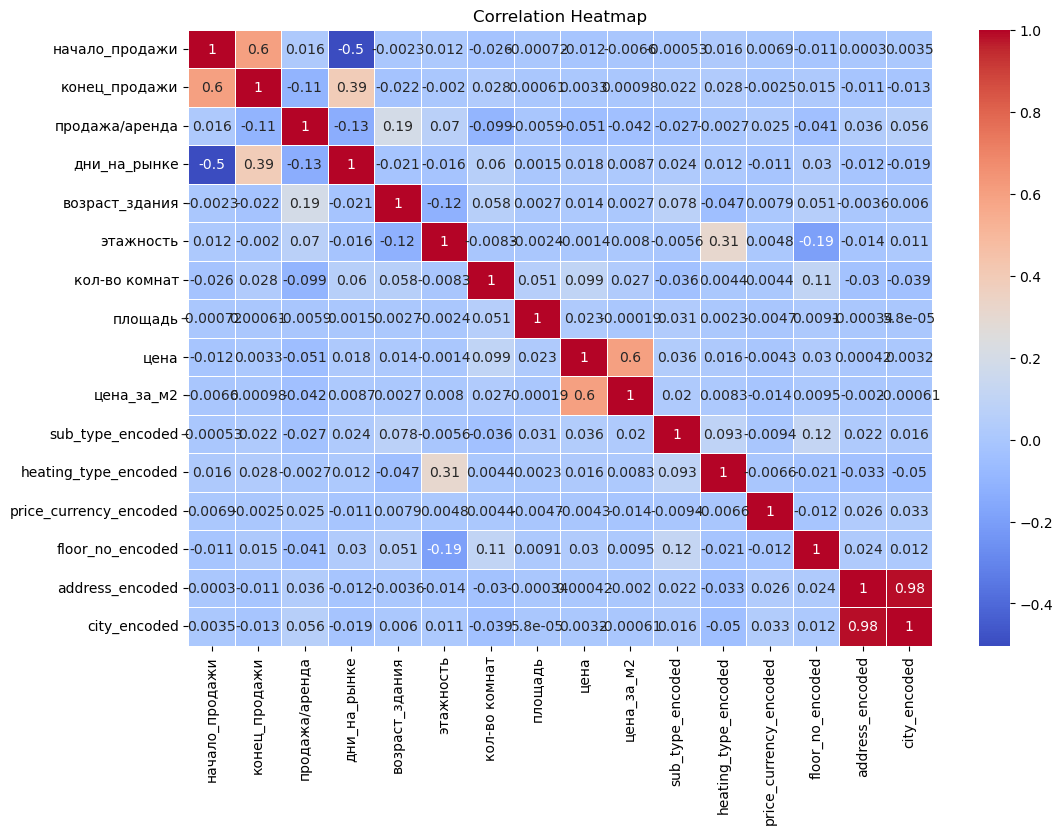

In [75]:
corr_matrix = data.corr()

# Создание тепловой таблицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

###  Имеется зависимость между адресом и городом что естественно, конец продажи и начало продажи, цена и цена за м2

# Обучение

In [119]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler

In [121]:
df_learn = data.drop(["начало_продажи", "конец_продажи", "дни_на_рынке", "price_currency_encoded", "address_encoded", "цена_за_м2"], axis=1)

In [122]:
column_translation = {
     'продажа/аренда':'listing_type',
     'возраст_здания':'building_age',
    'этажность':'total_floor_count' ,
    'кол-во комнат': 'room_count',
    'площадь' :'size',
    "цена":"price"
}
df_learn = df_learn.rename(columns=column_translation)


In [123]:
df_learn.head()

,listing_type,building_age,total_floor_count,room_count,size,price,sub_type_encoded,heating_type_encoded,floor_no_encoded,city_encoded
0,2,0,20,3,90.0,3500.0,6,0,11,36
1,1,0,20,1,43.0,490000.0,1,0,12,36
2,1,0,1,3,90.0,155000.0,1,0,23,68
3,1,3,20,7,450.0,32500000.0,6,0,12,36
4,1,0,20,3,90.0,1450000.0,6,0,11,36


In [124]:
df_learn.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_type,358504.0,1.289590,4.650684e-01,1.0,1.0,1.0,2.0,3.000000e+00
building_age,358504.0,6.882503,8.652556e+00,0.0,0.0,3.0,13.0,4.000000e+01
total_floor_count,358504.0,5.824197,4.088056e+00,1.0,3.0,4.0,6.0,2.000000e+01
room_count,358504.0,3.675722,1.138276e+00,1.0,3.0,4.0,4.0,1.400000e+01
size,358504.0,159.002979,3.944043e+03,20.0,90.0,115.0,136.0,9.090390e+05
price,358504.0,430325.862043,5.119542e+06,1.0,2750.0,205000.0,350000.0,1.650000e+09
sub_type_encoded,358504.0,1.303642,1.489209e+00,0.0,1.0,1.0,1.0,9.000000e+00
heating_type_encoded,358504.0,4.264714,4.519554e+00,0.0,1.0,1.0,6.0,1.500000e+01
floor_no_encoded,358504.0,14.692048,8.355139e+00,0.0,11.0,14.0,20.0,2.900000e+01
city_encoded,358504.0,31.163488,1.991497e+01,0.0,9.0,36.0,37.0,8.100000e+01


In [125]:
# Удаляем экстремальные выбросы (верхние 1-2%)
Q99 = df_learn['price'].quantile(0.98)
df_learn = df_learn[df_learn['price'] <= Q99]

Убираем самые дорогие 2% объектов, чтобы модель не переобучалась на аномалиях и логарифмируем данные

In [126]:
df_learn['price'] = np.log1p(df_learn['price'])
df_learn['size'] = np.log1p(df_learn['size'])

* Логарифмирование помогает нормализовать распределение, уменьшить влияние выбросов и сделать данные более линейными

Разделим признаки и целевую переменную

In [127]:
X = df_learn.drop('price',axis=1)
y = df_learn['price']

Масштабируем данные с помощью StandardScaler(), чтобы подготовить данные для обучения

In [128]:
sc1 = StandardScaler()
sc_y1 = StandardScaler()
X_scaled = sc1.fit_transform(X)
y_scaled = sc_y1.fit_transform(y.values.reshape(-1, 1))

Разделение на обучающую и тестовую выборки: 70% данных для обучения, 30% для тестирования.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled ,test_size=0.3, random_state=42)

In [129]:
X.head()

,listing_type,building_age,total_floor_count,room_count,size,sub_type_encoded,heating_type_encoded,floor_no_encoded,city_encoded
0,2,0,20,3,4.510860,6,0,11,36
1,1,0,20,1,3.784190,1,0,12,36
2,1,0,1,3,4.510860,1,0,23,68
4,1,0,20,3,4.510860,6,0,11,36
5,1,2,15,2,3.828641,6,0,1,36


In [130]:
y_scaled

array([[-1.12105307],
       [ 0.83033755],
       [ 0.37580599],
       ...,
       [ 0.69746171],
       [ 1.37297338],
       [-1.70352239]])

Отныне данные наконец готовы для обучения моделей машинного обучения. Признаки и целевая переменная масштабированы, что улучшит производительность алгоритмов.

## RandomForestRegressor

In [132]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=3,random_state = 42)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, random_state=42)

Модель случайного леса со 100 деревьями и ограничением глубины 3 для предотвращения переобучения.

Предсказание на тестовых данных

In [133]:
rfr_pred = rfr.predict(X_test)

In [134]:
mse = round(mean_squared_error(y_test, rfr_pred), 3)
r2_rfr = metrics.r2_score(y_test,rfr_pred)
print('mean_absolute-Error',metrics.mean_absolute_error(y_test,rfr_pred))
print('mean-squared-error',metrics.mean_squared_error(y_test,rfr_pred))
print('r2score',metrics.r2_score(y_test,rfr_pred))

mean_absolute-Error 0.17239184143457129
mean-squared-error 0.0600484561633783
r2score 0.9398347318929949


Средняя абсолютная ошибка в масштабированных единицах

Средняя квадратичная ошибка (более чувствительна к выбросам)

Модель объясняет 94% дисперсии целевой переменной - это очень даже хороший результат

In [135]:
kf = KFold(5)
cross_val = cross_val_score(rfr, X_train, y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.94045238 0.94126898 0.9407011  0.94107592 0.94084224]
Train CV mean : 0.941


Оценка устойчивости модели: вполне стабильно высокие результаты

### Модель Random Forest показывает превосходное качество - (R² = 0.94)

### Модель хорошо обобщает и может использоваться для прогнозирования цен на недвижимость

# GradientBoostingRegressor

In [137]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [138]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [139]:
gbr_pred = gbr.predict(X_test)

In [140]:
mse = round(mean_squared_error(y_test, gbr_pred), 3)
r2_gbr = metrics.r2_score(y_test,gbr_pred)
print('mean_absolute-Error',metrics.mean_absolute_error(y_test,gbr_pred))
print('mean-squared-error',metrics.mean_squared_error(y_test,gbr_pred))
print('r2score',metrics.r2_score(y_test,gbr_pred))

mean_absolute-Error 0.13337004983962736
mean-squared-error 0.039591225754438075
r2score 0.9603317576438635


Лучше чем у Random Forest (0.172) - на 23% меньше

Значительно лучше чем у Random Forest (0.060) - на 33% меньше

Объясняет 96% дисперсии - результат еще лучше чем у randomforest

In [141]:
kf = KFold(10)
cross_val = cross_val_score(gbr, X_train, y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.95994714 0.9611815  0.96074231 0.96155539 0.96164378 0.96108149
 0.96099312 0.96093511 0.96102792 0.96059193]
Train CV mean : 0.961


Также стабильные результаты по устойчивости и демонстрация хорошего обобщения

### Модель значительно превосходит Random Forest по всем метрикам
### Пока что, Gradient Boosting - лучшая модель для данной задачи прогнозирования цен

# StackingRegressor

In [143]:
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [144]:
estimators = [
    ('rf', RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )),
    ('gb', GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ))
]

sr = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

In [145]:
sr.fit(X_train, y_train)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=10, n_jobs=-1,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(max_depth=5,
                                                         random_state=42))],
                  final_estimator=RidgeCV())

In [146]:
sr_pred = sr.predict(X_test)

In [147]:
mse = round(mean_squared_error(y_test, sr_pred), 3)
r2_sr = metrics.r2_score(y_test,sr_pred)
print('mean_absolute-Error',metrics.mean_absolute_error(y_test,sr_pred))
print('mean-squared-error',metrics.mean_squared_error(y_test,sr_pred))
print('r2score',metrics.r2_score(y_test,sr_pred))

mean_absolute-Error 0.12423448382498004
mean-squared-error 0.035424487041401144
r2score 0.9645066018916427


Лучше чем у Gradient Boosting (0.133) - на 7% меньше ошибка

Значительно лучше чем у Gradient Boosting (0.040) - на 12.5% меньше

Объясняет 96.5% дисперсии - наилучший результат!

# Сравнение метрик

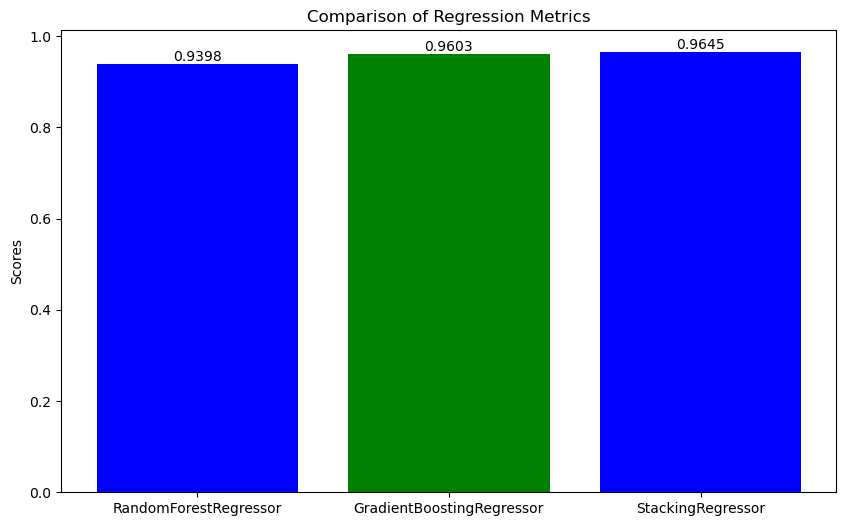

In [149]:
metrics_k = ['RandomForestRegressor', 'GradientBoostingRegressor','StackingRegressor']
scores_k = [r2_rfr, r2_gbr,r2_sr]

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(metrics_k, scores_k, color=['blue', 'green'])
plt.ylabel('Scores')
plt.title('Comparison of Regression Metrics')

for i, v in enumerate(scores_k):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.show()

### Stacking Regressor показывает наилучшее качество среди всех tested моделей (R² = 0.965)

### Является оптимальным выбором для данной задачи, так как показывает наивысшую точность и надежность прогнозов

# Классификация

In [299]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  f1_score

### Подготовка данных для классификации

In [301]:
df_classifier = data.drop(["начало_продажи","конец_продажи","дни_на_рынке","address_encoded","price_currency_encoded","цена_за_м2"], axis=1)

In [302]:
column_translation = {
     'продажа/аренда':'listing_type',
     'возраст_здания':'building_age',
    'этажность':'total_floor_count' ,
    'кол-во комнат': 'room_count',
    'площадь' :'size',
    "цена":"price"
}
df_classifier = df_classifier.rename(columns=column_translation)

In [305]:
df_classifier.head()

,listing_type,building_age,total_floor_count,room_count,size,price,sub_type_encoded,heating_type_encoded,floor_no_encoded,city_encoded
0,2,0,20,3,90.0,3500.0,6,0,11,36
1,1,0,20,1,43.0,490000.0,1,0,12,36
2,1,0,1,3,90.0,155000.0,1,0,23,68
3,1,3,20,7,450.0,32500000.0,6,0,12,36
4,1,0,20,3,90.0,1450000.0,6,0,11,36


In [307]:
from collections import Counter

# Анализ распределения классов
class_distribution = df_classifier['sub_type_encoded'].value_counts()
class_percentage = df_classifier['sub_type_encoded'].value_counts(normalize=True) * 100

print("Распределение классов sub_type_encoded:")
print(class_distribution)
print("\nПроцентное распределение:")
print(class_percentage)

Распределение классов sub_type_encoded:
sub_type_encoded
1    317925
0     18195
9      7241
6      6721
4      5291
8      2289
7       406
5       232
2       149
3        55
Name: count, dtype: int64

Процентное распределение:
sub_type_encoded
1    88.681019
0     5.075257
9     2.019782
6     1.874735
4     1.475855
8     0.638487
7     0.113248
5     0.064713
2     0.041562
3     0.015342
Name: proportion, dtype: float64


Сильный дисбаланс классов - класс 1 составляет 88.7% всех данных.

Это может привести к смещению модели

Разделим на признаки и целевую переменную

In [309]:
X_cl = df_classifier.drop('sub_type_encoded', axis=1)
y_cl = df_classifier['sub_type_encoded']

### Используем стратегию балансировки при котором: 
* Уменьшаем с 317к до 50к
* Вилла: увеличим с 18k до 25k  
* Кооператив: увеличим с 7k до 15k   
* Резиденция: увеличим с 6k до 15k 
* Увеличиваем мелкие классы

In [311]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

sampling_strategy = {
    1: 50000,  
    0: 25000,   
    9: 15000,   
    6: 14000,   
    4: 12000,   
    8: 6000,   
    7: 3000,    
    5: 2000,    
    2: 1800,   
    3: 1000 
}

# Пайплайн с ускоренными настройками для 
# быстрой балансировки несбалансированных данных
pipeline = Pipeline([
    ('under', RandomUnderSampler(
        sampling_strategy={1: 50000},
        random_state=42
    )),
    
    ('over', SMOTE(
        sampling_strategy=sampling_strategy,
        k_neighbors=3,
        n_jobs=-1,     
        random_state=42
    ))
])
X_cl, y_cl = pipeline.fit_resample(X_cl, y_cl)

In [313]:
sc2 = StandardScaler()
X_cl_scaled = sc2.fit_transform(X_cl)
X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_cl_scaled, y_cl ,test_size=0.3, random_state=42)

### Обнаружен сильный дисбаланс классов 88.7%
### Создан более сбалансированный датасет для обучения моделей классификации

Просмотрим как закодировались типы зданий

In [317]:
for i,k in  list(zip(sub_type_encoder.classes_, range(len(sub_type_encoder.classes_)))):
    print (f"{i} - {k}")

Вилла - 0
Квартира - 1
Квартира у моря - 2
Кооператив - 3
Летний дом - 4
Особняк / Усадьба - 5
Резиденция - 6
Фермерский дом - 7
Целое здание - 8
Частный дом - 9


# RandomForestClassifier

In [320]:
rfc_cls = RandomForestClassifier(random_state = 42)
rfc_cls.fit(X_cl_train,y_cl_train)

RandomForestClassifier(random_state=42)

In [321]:
rfc_pred_test = rfc_cls.predict(X_cl_test)
display(rfc_pred_test[:20], np.array(y_cl_test[:20]))

array([1, 1, 2, 1, 0, 0, 1, 1, 1, 7, 6, 6, 0, 9, 0, 1, 1, 9, 1, 1])

array([1, 1, 2, 1, 0, 0, 1, 1, 1, 7, 6, 6, 0, 9, 0, 1, 1, 9, 1, 1])

Предсказание на тестовых данных и сравнение с реальными значениями

In [322]:
print(classification_report(y_cl_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      7576
           1       0.94      0.95      0.95     15107
           2       0.95      0.94      0.95       545
           3       0.99      0.93      0.96       322
           4       0.88      0.82      0.85      3572
           5       0.94      0.94      0.94       577
           6       0.91      0.87      0.89      4213
           7       0.94      0.91      0.93       894
           8       0.97      0.95      0.96      1771
           9       0.86      0.83      0.84      4363

    accuracy                           0.91     38940
   macro avg       0.92      0.90      0.91     38940
weighted avg       0.91      0.91      0.91     38940



#### F1-score (macro average) - основная метрика для несбалансированных данных
#### Precision - точность предсказаний для каждого класса

In [323]:
f1_rfc = f1_score(y_cl_test, rfc_pred_test,  average="macro")

#### Отличные результаты: accuracy 92%, macro F1-score 91%

#### Хорошая сбалансированность precision и recall по всем классам

#### Классы 2, 3, 5, 8 показывают наивысшее качество (F1 > 0.94)

# GradientBoostingClassifier

In [167]:
gbc = GradientBoostingClassifier(random_state = 42)
gbc.fit(X_cl_train, y_cl_train)

GradientBoostingClassifier(random_state=42)

In [168]:
gbc_pred_test = gbc.predict(X_cl_test)
display(gbc_pred_test[:20], np.array(y_cl_test[:20]))

array([1, 1, 2, 1, 0, 0, 1, 1, 1, 7, 6, 6, 0, 9, 0, 1, 1, 0, 1, 1])

array([1, 1, 2, 1, 0, 0, 1, 1, 1, 7, 6, 6, 0, 9, 0, 1, 1, 9, 1, 1])

19 из 20 предсказаний верные

In [169]:
print(classification_report(y_cl_test, gbc_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.84      0.79      7576
           1       0.89      0.93      0.91     15107
           2       0.88      0.73      0.79       545
           3       0.90      0.75      0.81       322
           4       0.74      0.68      0.71      3572
           5       0.84      0.74      0.79       577
           6       0.85      0.77      0.81      4213
           7       0.79      0.74      0.76       894
           8       0.92      0.91      0.91      1771
           9       0.75      0.64      0.69      4363

    accuracy                           0.83     38940
   macro avg       0.83      0.77      0.80     38940
weighted avg       0.83      0.83      0.83     38940



In [170]:
f1_gbc = f1_score(y_cl_test, gbc_pred_test,  average="macro")

#### GradientBoostingClassifier показывает удовлетворительные, но не лучшие результаты в сравнении с RandomForest. 

#### Random Forest остается лучшим выбором для данной задачи классификации.

# StackingClassifier

In [172]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

In [173]:
stcl = StackingClassifier(
    estimators=estimators,
    final_estimator= KNeighborsClassifier() ,
    cv=5,
    stack_method='auto',
    n_jobs=-1
)

In [174]:
stcl.fit(X_cl_train, y_cl_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=KNeighborsClassifier(), n_jobs=-1)

In [175]:
stcl_pred_test = stcl.predict(X_cl_test)
display(stcl_pred_test[:20], np.array(y_cl_test[:20]))

array([1, 1, 2, 1, 0, 0, 1, 1, 1, 7, 6, 6, 0, 0, 0, 1, 1, 9, 1, 1])

array([1, 1, 2, 1, 0, 0, 1, 1, 1, 7, 6, 6, 0, 9, 0, 1, 1, 9, 1, 1])

Все 20 предсказаний верные

In [176]:
print(classification_report(y_cl_test, stcl_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7576
           1       0.93      0.95      0.94     15107
           2       0.92      0.95      0.94       545
           3       0.97      0.95      0.96       322
           4       0.85      0.81      0.83      3572
           5       0.92      0.94      0.93       577
           6       0.90      0.86      0.88      4213
           7       0.92      0.92      0.92       894
           8       0.96      0.96      0.96      1771
           9       0.85      0.80      0.82      4363

    accuracy                           0.90     38940
   macro avg       0.91      0.90      0.90     38940
weighted avg       0.90      0.90      0.90     38940



In [177]:
f1_stc = f1_score(y_cl_test, stcl_pred_test, average="macro")

F1-score 0.90 - достойный результат

Лучше чем Gradient Boosting, но хуже чем Random Forest. Имеются те же проблемы что и у других моделей

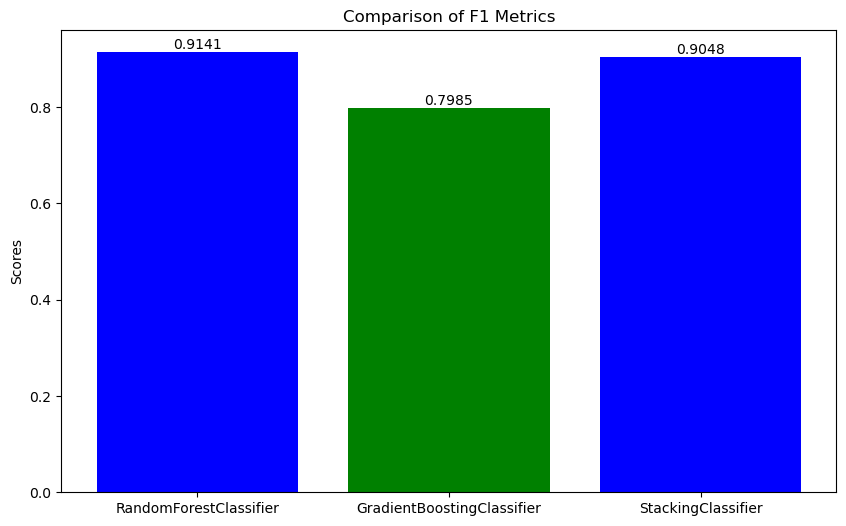

In [178]:

metrics_k = ['RandomForestClassifier', 'GradientBoostingClassifier','StackingClassifier']
scores_k = [f1_rfc, f1_gbc,f1_stc]

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(metrics_k, scores_k, color=['blue', 'green'])
plt.ylabel('Scores')
plt.title('Comparison of F1 Metrics')

for i, v in enumerate(scores_k):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.show()

## RandomForestClassifier: 0.9141 ✅

## StackingClassifier: 0.9048  

## GradientBoostingClassifier: 0.7985 ❌

## RandomForestClassifier демонстрирует наилучшее соотношение качества, скорости и простоты использования для задачи классификации типов недвижимости. 

## Модель готова к внедрению для прогнозирования цен недвижимости.

In [179]:
import pickle

# with open('regressor_model1.pkl', 'wb') as file:
#     pickle.dump(sr, file)

# with open('classifier_model1.pkl', 'wb') as file:
#     pickle.dump(rfc_cls, file)
    

# with open('sub_type_encoder.pkl', 'wb') as file:
#     pickle.dump(sub_type_encoder, file)
# with open('city_encoder.pkl', 'wb') as file:
#     pickle.dump(city_encoder, file)
# with open('floor_encoder.pkl', 'wb') as file:
#     pickle.dump(floor_encoder, file)
# with open('heating_encoder.pkl', 'wb') as file:
#     pickle.dump(heating_encoder, file)

# with open('scaler1.pkl', 'wb') as file:
#     pickle.dump(sc1, file)
# with open('scaler_y1.pkl', 'wb') as file:
#     pickle.dump(sc_y1, file)
# with open('scaler2.pkl', 'wb') as file:
#     pickle.dump(sc2, file)

# Заключение
    Была проведена работа по очистке и преобразованию набора данных, содержащего более 400 тысяч записей об объектах недвижимости в Турции. Цель достигнута, благодаря:

    1. Обработке данных:

    - Были удалены столбцы, не несущие информационной ценности.

    - Удалены дубликаты, что повысило качество данных.

    - Перевод турецких слов, для лучшей интерпретации данных.

    - Заполнены пропуски.

    3. Очистке от аномалий и шума:

    - Были выявлены и удалены статистические аномалии.

    - Проведена работа по приведению типов данных.

    4. Обучение моделей
    
    - Для каждой задачи было обучено по несколько моделей.
  
    - Лучшие модели выявлены по результатам сравнительного анализа.  
    
   <font color='red'>В результате получены надежные данные для дальнейшего прогнозирования цен недвижимости.</font>

# Ссылка на дашборд: https://datalens.yandex/lmqjo6tcbu206